In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from collections import defaultdict
import os

import warnings
warnings.filterwarnings("ignore", module="matplotlib")
import glob
import os

In [4]:
# Directory containing the CSV files
csv_dir = "temp_vcfs/"  

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_dir, "*.tsv"))

# Initialize a variable to store the sum
spectra = None

# Iterate through each file and sum them
for file in csv_files:
    try:
        df = pd.read_csv(file,delimiter='\t', index_col=0)  # Read CSV with index
    except:
        continue
    spectra = df if spectra is None else spectra.add(df, fill_value=0)  # Element-wise sum

spectra = spectra.drop(labels=['AA>AG'], axis=1)

# Save the final summed DataFrame
spectra.to_csv("spectra.csv")
spectra

,AAA>ACA,AAA>AGA,AAA>ATA,AAC>ACC,AAC>AGC,AAC>ATC,AAG>ACG,AAG>AGG,AAG>ATG,AAT>ACT,...,TCA>TTA,TCC>TAC,TCC>TGC,TCC>TTC,TCG>TAG,TCG>TGG,TCG>TTG,TCT>TAT,TCT>TGT,TCT>TTT
sample,,,,,,,,,,,,,,,,,,,,,
aligned/k562_aavs_d12_rep2_S7.bam,39161.0,54040.0,23145.0,25395.0,37830.0,20694.0,21456.0,54680.0,27760.0,32800.0,...,61636.0,30978.0,30037.0,74652.0,10042.0,11609.0,61116.0,31764.0,37421.0,112053.0
aligned/k562_aavs_d15_rep2_S8.bam,37677.0,53652.0,22891.0,23220.0,37398.0,20729.0,19492.0,52029.0,27805.0,30708.0,...,59408.0,29565.0,29124.0,70132.0,9427.0,11378.0,59034.0,29902.0,36710.0,108576.0
aligned/k562_aavs_d3_rep2_S4.bam,63588.0,88674.0,36749.0,37198.0,50027.0,26097.0,30564.0,76550.0,34972.0,59158.0,...,91687.0,38135.0,32488.0,91839.0,12115.0,12677.0,72913.0,49986.0,45339.0,205685.0
aligned/k562_aavs_d6_rep2_S5.bam,61509.0,82852.0,35431.0,37613.0,49413.0,28469.0,30684.0,75725.0,37671.0,57084.0,...,89113.0,39321.0,33883.0,98100.0,12507.0,13389.0,77019.0,45551.0,47490.0,211048.0
aligned/k562_aavs_d9_rep2_S6.bam,54998.0,74181.0,32913.0,33007.0,45427.0,27142.0,26978.0,67678.0,36951.0,46704.0,...,78685.0,34280.0,28247.0,82174.0,11577.0,11729.0,67244.0,43171.0,43071.0,167665.0
aligned/k562_hdr2_d12_rep1_S17.bam,91709.0,111794.0,44358.0,59355.0,66174.0,38783.0,52627.0,111753.0,54212.0,84463.0,...,127452.0,59266.0,42833.0,145163.0,19016.0,15809.0,104109.0,78986.0,61583.0,291062.0
aligned/k562_hdr2_d12_rep2_S12.bam,76388.0,94989.0,35103.0,46857.0,51760.0,29874.0,40107.0,83308.0,40237.0,74672.0,...,89709.0,39117.0,30120.0,91931.0,12120.0,11376.0,72128.0,57177.0,43803.0,224076.0
aligned/k562_hdr2_d15_rep2_S13.bam,56638.0,73036.0,28138.0,34504.0,41476.0,24465.0,30411.0,64840.0,32568.0,52173.0,...,75518.0,32600.0,25675.0,72956.0,10322.0,10001.0,59861.0,43675.0,35690.0,158993.0
aligned/k562_hdr2_d3_rep1_S14.bam,51224.0,65470.0,26736.0,33791.0,42339.0,25566.0,29655.0,66790.0,34792.0,45073.0,...,73241.0,37457.0,30534.0,84934.0,11865.0,11718.0,69058.0,44825.0,39881.0,155002.0


In [7]:
spectra.columns

Index(['AAA>ACA', 'AAA>AGA', 'AAA>ATA', 'AAC>ACC', 'AAC>AGC', 'AAC>ATC',
       'AAG>ACG', 'AAG>AGG', 'AAG>ATG', 'AAT>ACT', 'AAT>AGT', 'AAT>ATT',
       'ACA>AAA', 'ACA>AGA', 'ACA>ATA', 'ACC>AAC', 'ACC>AGC', 'ACC>ATC',
       'ACG>AAG', 'ACG>AGG', 'ACG>ATG', 'ACT>AAT', 'ACT>AGT', 'ACT>ATT',
       'CAA>CCA', 'CAA>CGA', 'CAA>CTA', 'CAC>CCC', 'CAC>CGC', 'CAC>CTC',
       'CAG>CCG', 'CAG>CGG', 'CAG>CTG', 'CAT>CCT', 'CAT>CGT', 'CAT>CTT',
       'CCA>CAA', 'CCA>CGA', 'CCA>CTA', 'CCC>CAC', 'CCC>CGC', 'CCC>CTC',
       'CCG>CAG', 'CCG>CGG', 'CCG>CTG', 'CCT>CAT', 'CCT>CGT', 'CCT>CTT',
       'GAA>GCA', 'GAA>GGA', 'GAA>GTA', 'GAC>GCC', 'GAC>GGC', 'GAC>GTC',
       'GAG>GCG', 'GAG>GGG', 'GAG>GTG', 'GAT>GCT', 'GAT>GGT', 'GAT>GTT',
       'GCA>GAA', 'GCA>GGA', 'GCA>GTA', 'GCC>GAC', 'GCC>GGC', 'GCC>GTC',
       'GCG>GAG', 'GCG>GGG', 'GCG>GTG', 'GCT>GAT', 'GCT>GGT', 'GCT>GTT',
       'TAA>TCA', 'TAA>TGA', 'TAA>TTA', 'TAC>TCC', 'TAC>TGC', 'TAC>TTC',
       'TAG>TCG', 'TAG>TGG', 'TAG>TTG', 'TAT>TCT', 

In [15]:
site_counts = pd.read_csv('site_counts.csv', index_col=0)
site_counts

,sites_dp>=10
sample,
k562_aavs_d12_rep2_S7,2528977154
k562_aavs_d15_rep2_S8,2568508603
k562_aavs_d3_rep2_S4,2758984574
k562_aavs_d6_rep2_S5,2753961720
k562_aavs_d9_rep2_S6,2636118421
k562_hdr2_d12_rep1_S17,2724197959
k562_hdr2_d12_rep2_S12,2671385571
k562_hdr2_d15_rep2_S13,2340479680
k562_hdr2_d3_rep1_S14,2439037587


In [10]:
titles = [
    'C>A',
    'C>G',
    'C>T',
    'A>T',
    'A>G',
    'A>C'
]

In [11]:
mut_types = {t:[] for t in titles}

for mut in spectra.columns.to_list():
    # C/G mutations
    if mut in ['CC>CA','AC>AA']:
        continue
    elif mut[1]=='C' and mut[-2]=='A':
        mut_types['C>A'].append(mut)
    elif mut[1]=='C' and mut[-2]=='G':
        mut_types['C>G'].append(mut)
    elif mut[1]=='C' and mut[-2]=='T':
        mut_types['C>T'].append(mut)

    # A/T mutations
    elif mut[1]=='A' and mut[-2]=='T':
        mut_types['A>T'].append(mut)
    elif mut[1]=='A' and mut[-2]=='G':
        mut_types['A>G'].append(mut)
    elif mut[1]=='A' and mut[-2]=='C':
        mut_types['A>C'].append(mut)
# mut_types    

In [12]:
PolE = mut_types['C>A'] + mut_types['C>T']
other = mut_types['C>G'] + mut_types['A>T'] + mut_types['A>G'] + mut_types['A>C']

In [13]:
hex_cols = [
    '#438CFD',
    '#01182E',
    '#ff1A5E',
    '#E6E6E6',
    '#80F15D',
    '#FFDB58'
]

In [14]:
def normalize(row):
    SF = int(site_counts.loc[row.name])
    return (row/SF)*1000000
spectra_norm=spectra.apply(normalize, axis=1)
spectra_norm=spectra_norm.fillna(value=0)
spectra_norm

KeyError: 'aligned/k562_aavs_d12_rep2_S7.bam'

# Individual spectra

### Raw

/loc/scratch/21406449/ipykernel_15623/2543176495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2543176495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2543176495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2543176495.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2543176495.py:12: UserWarning: set_ticklabels() should only be used with a fixed n

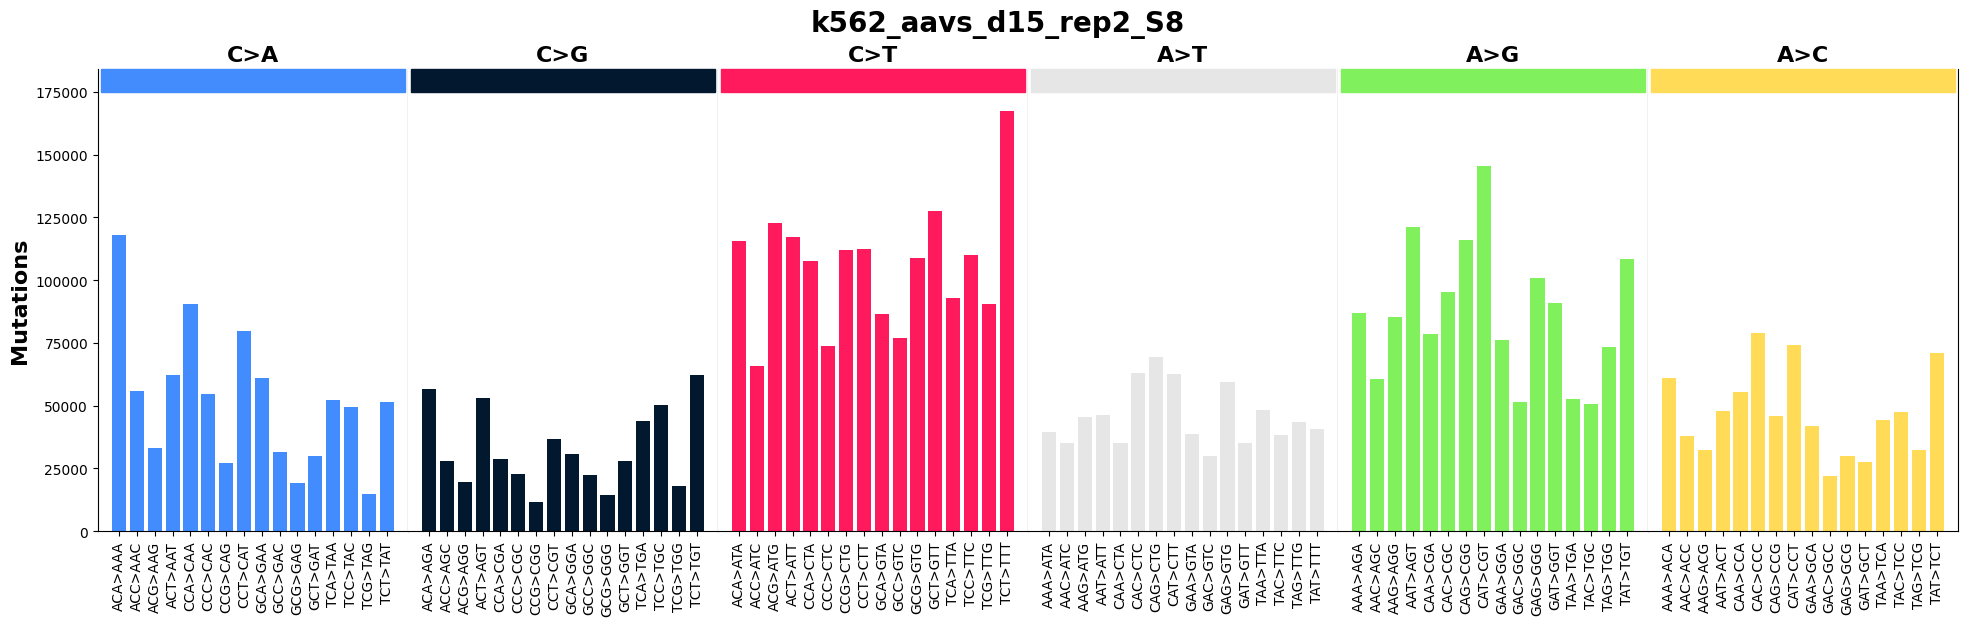

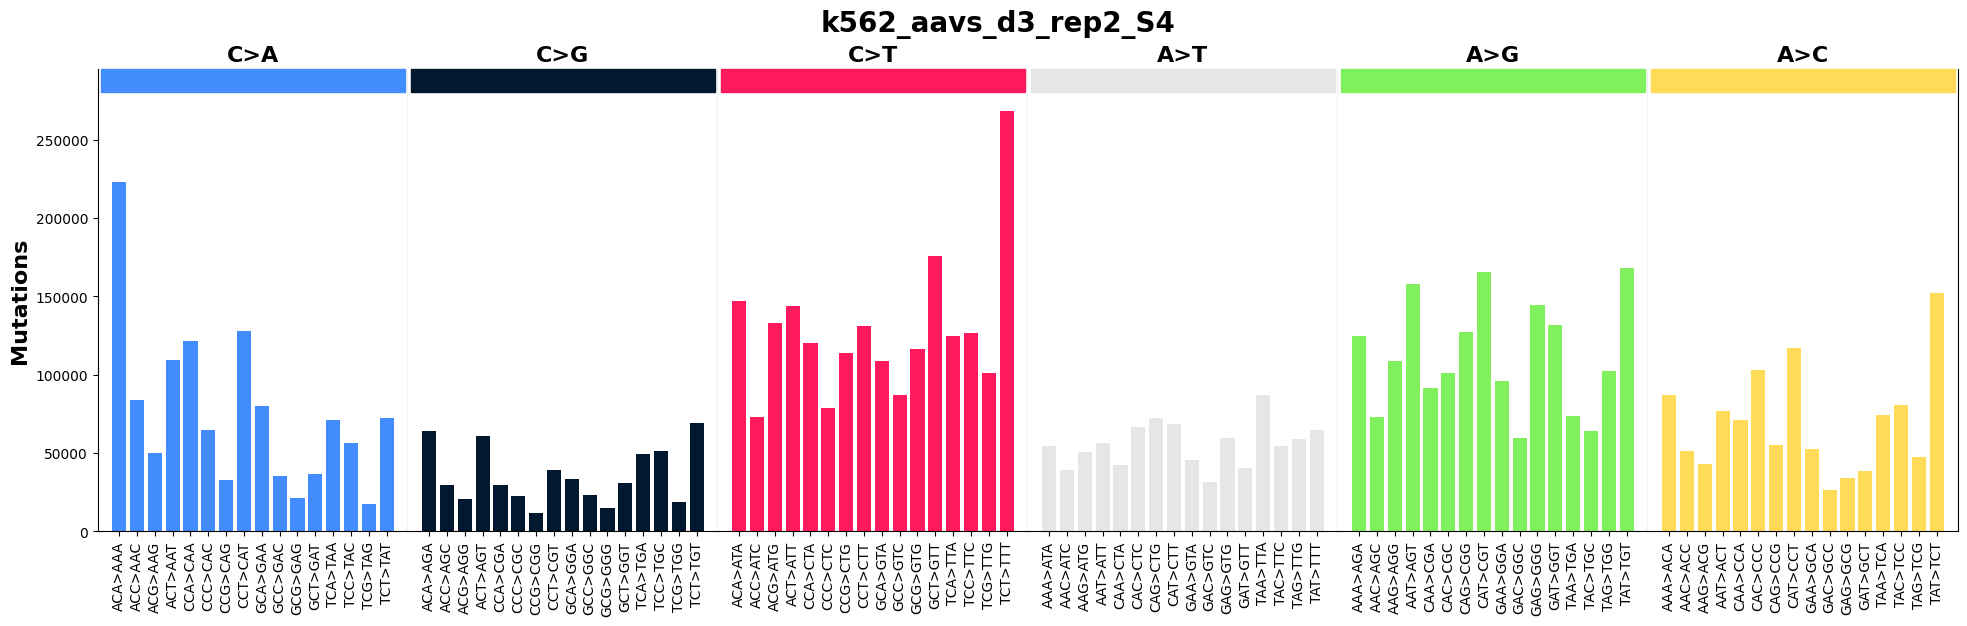

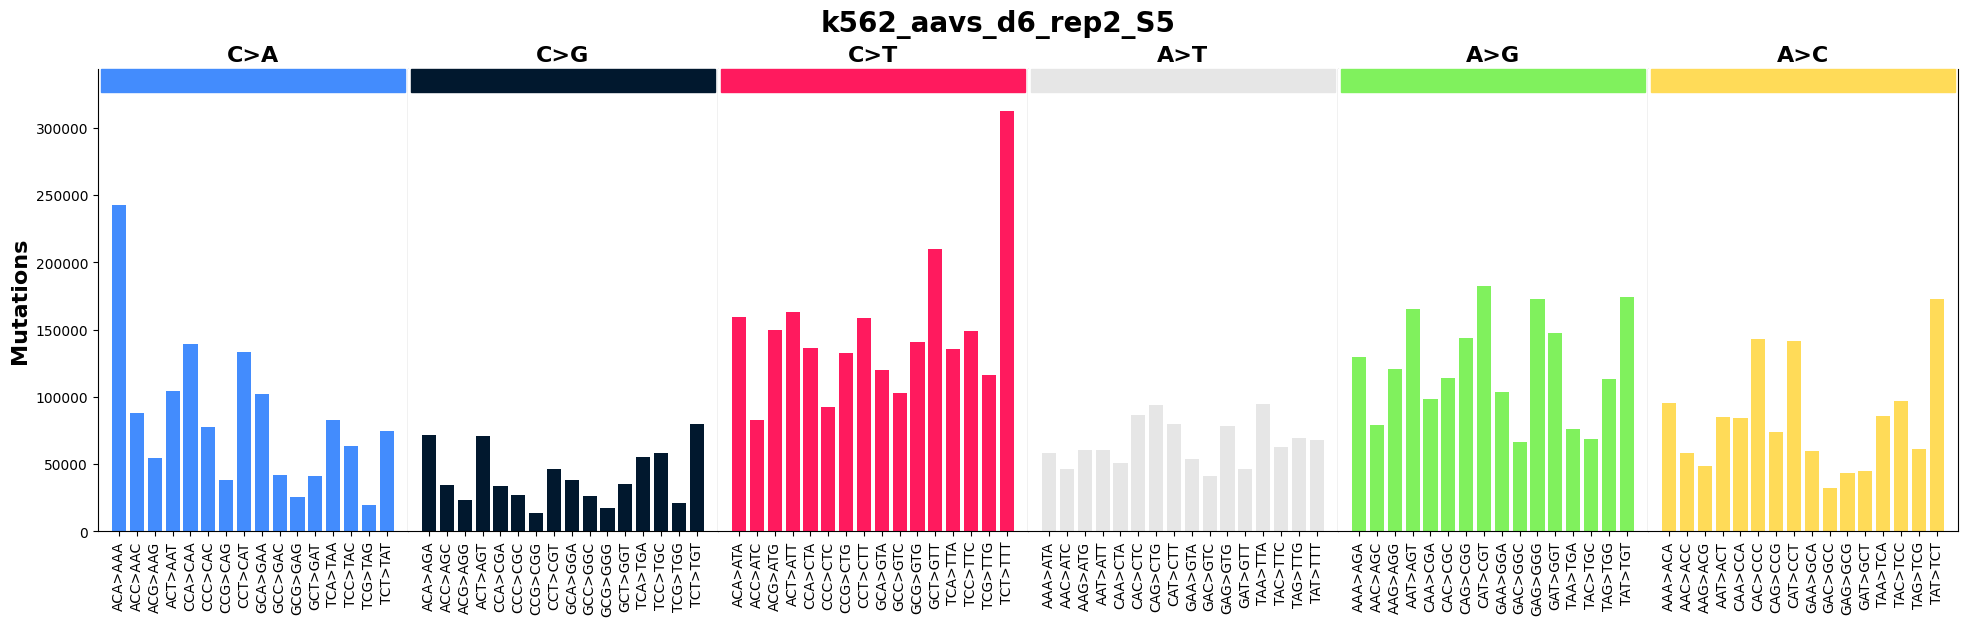

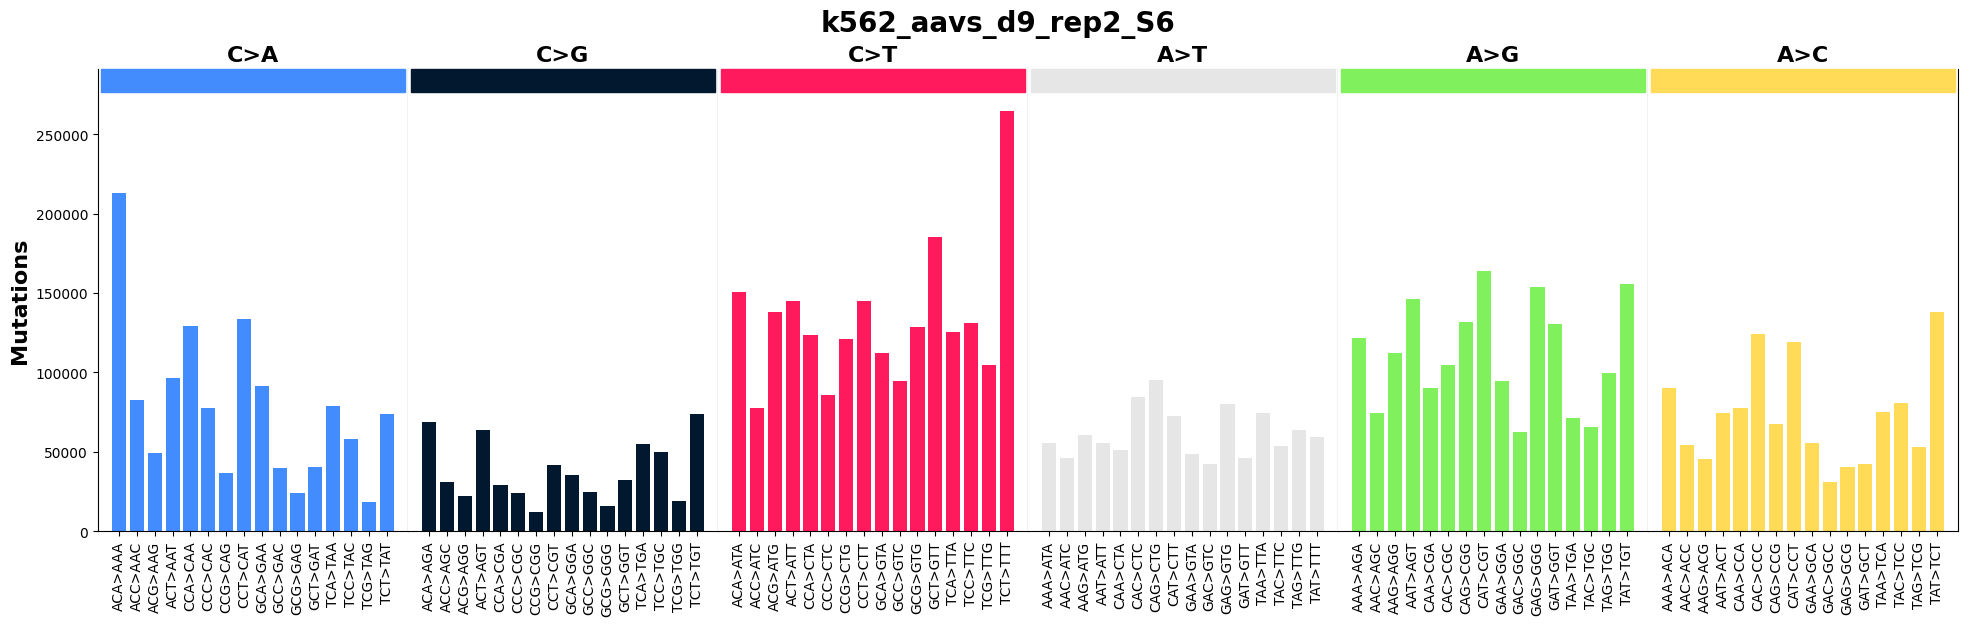

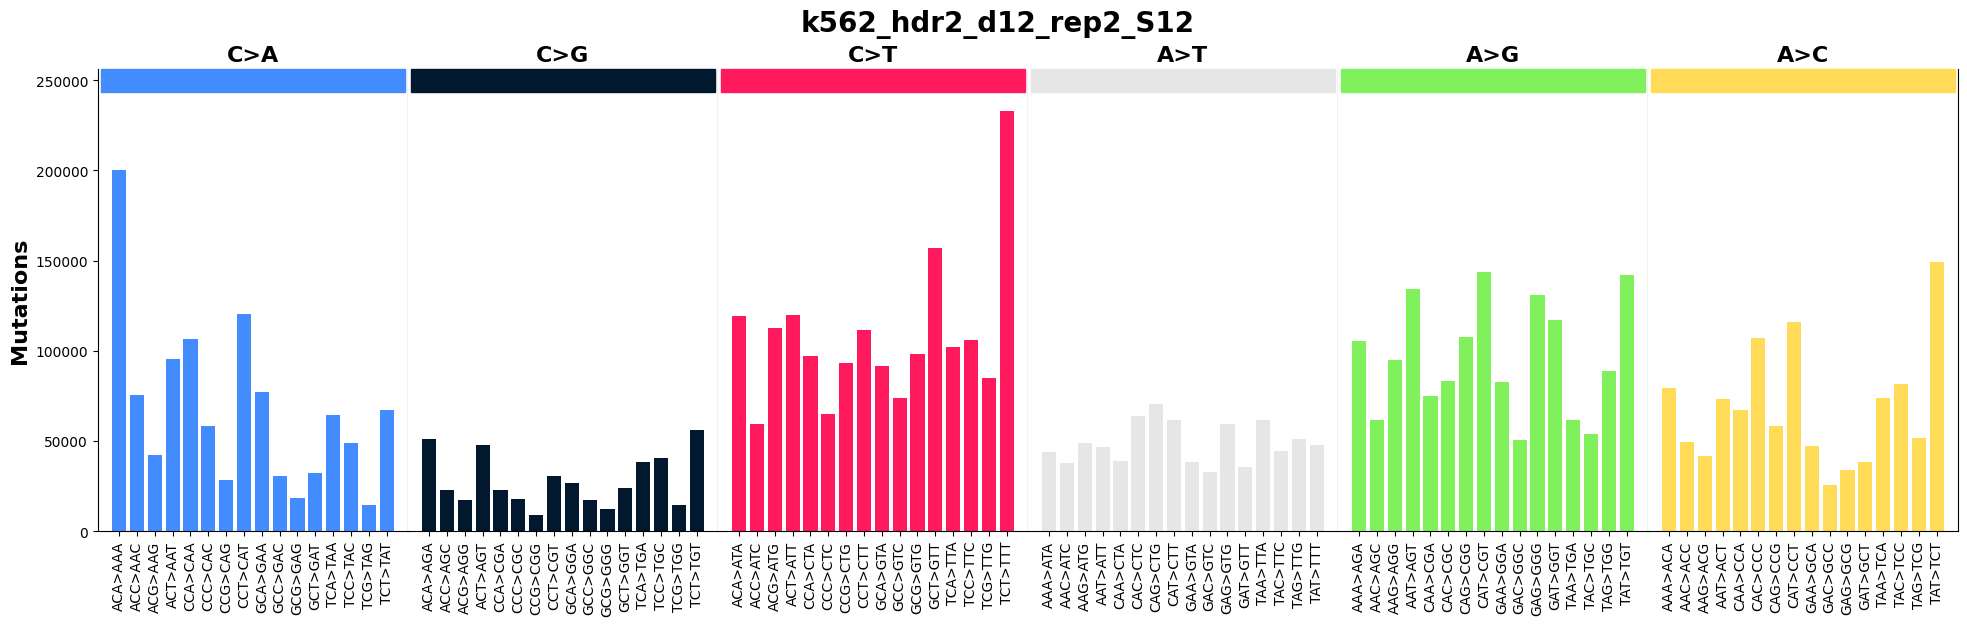

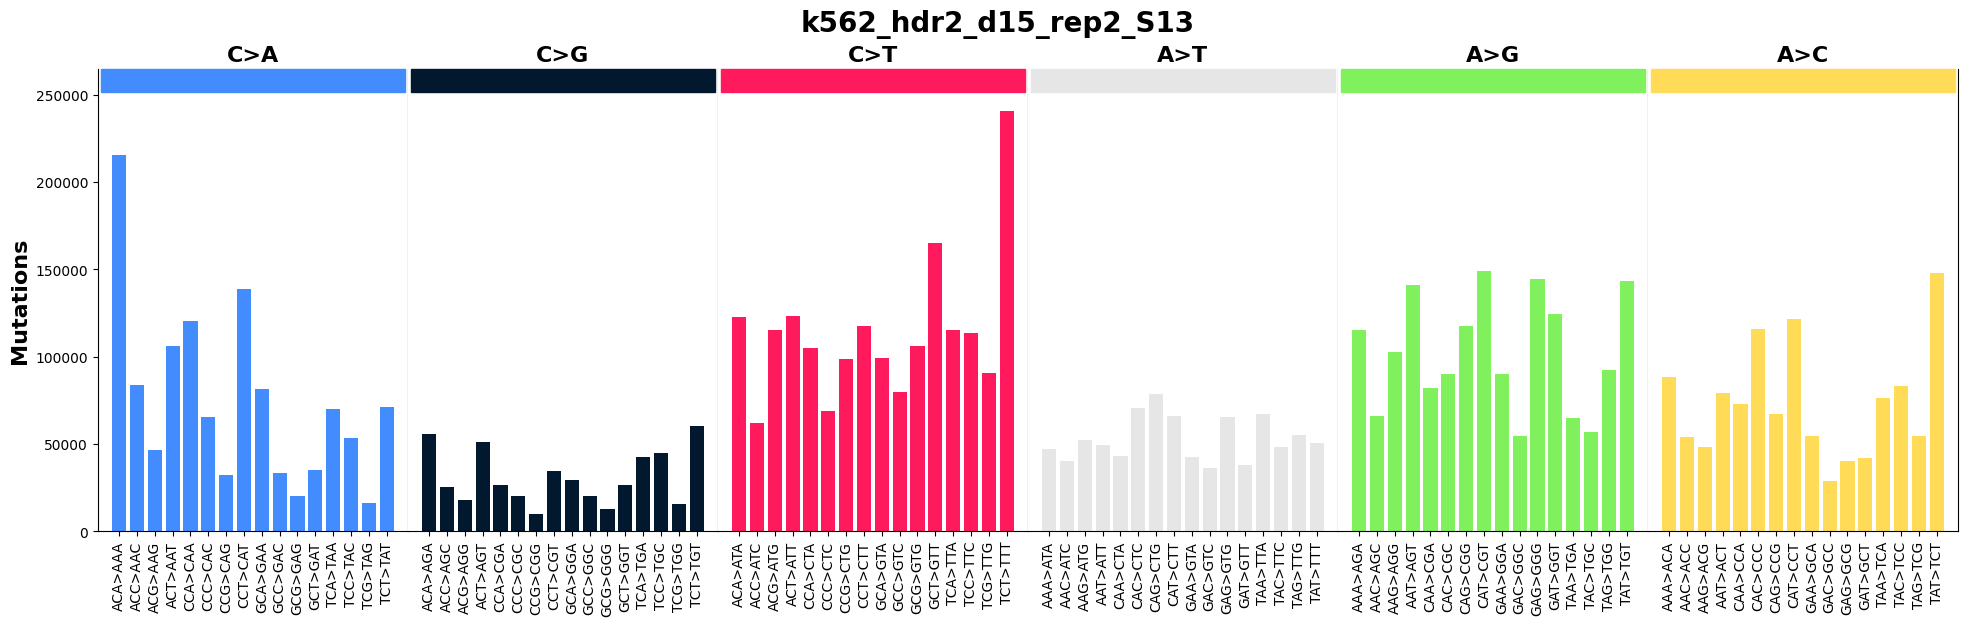

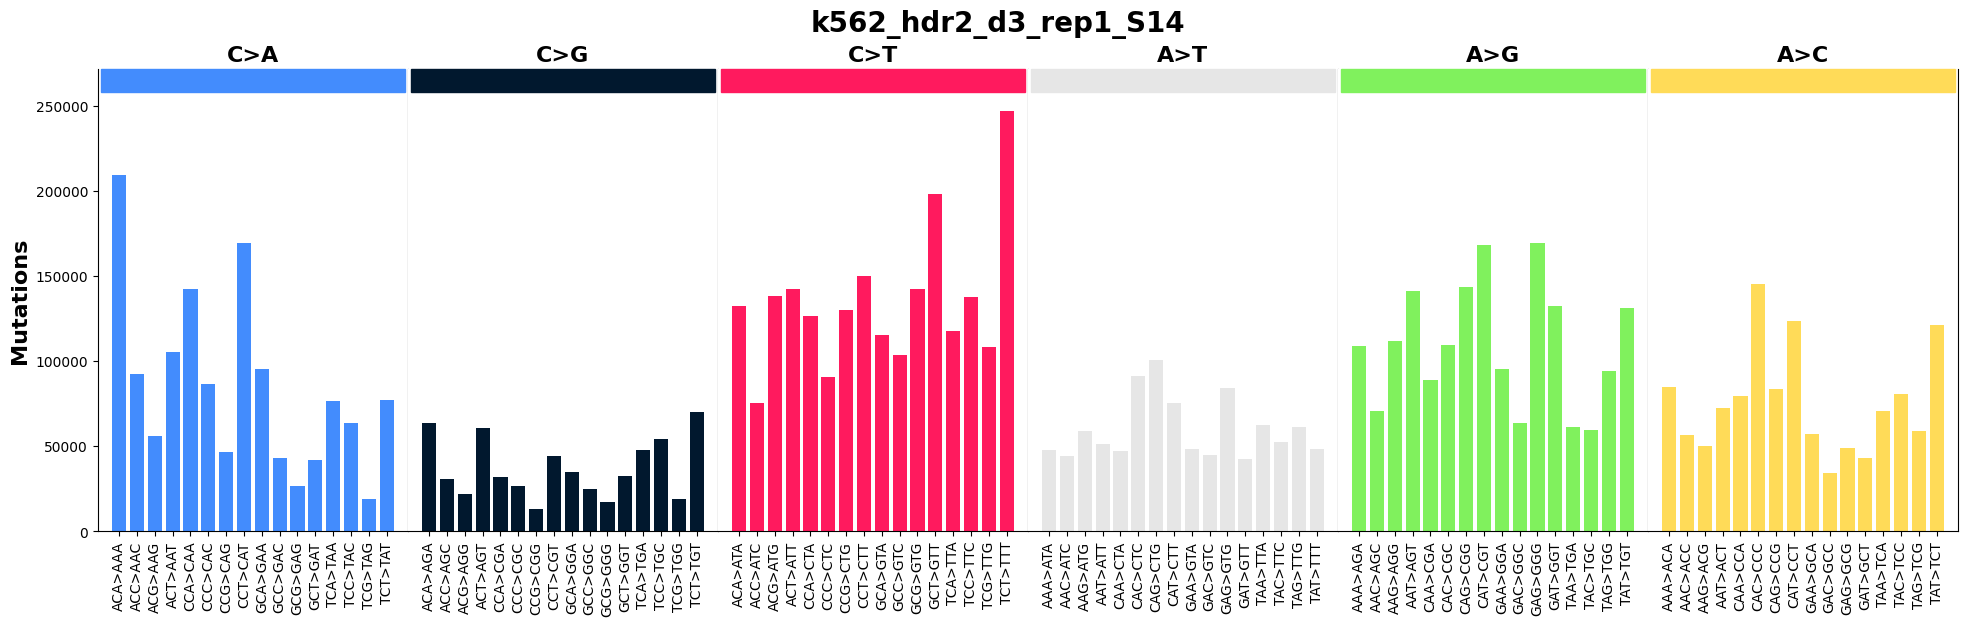

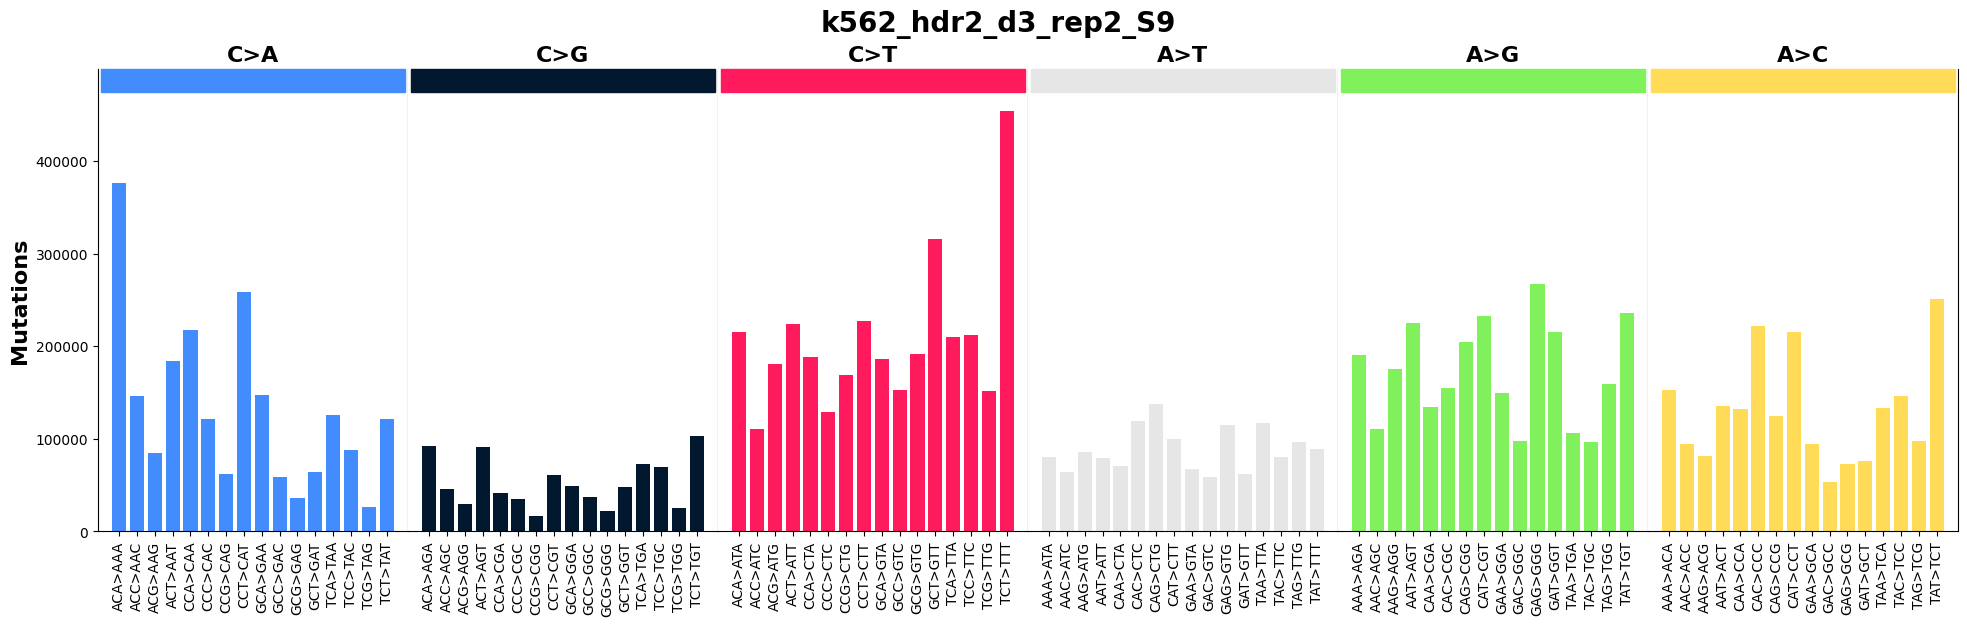

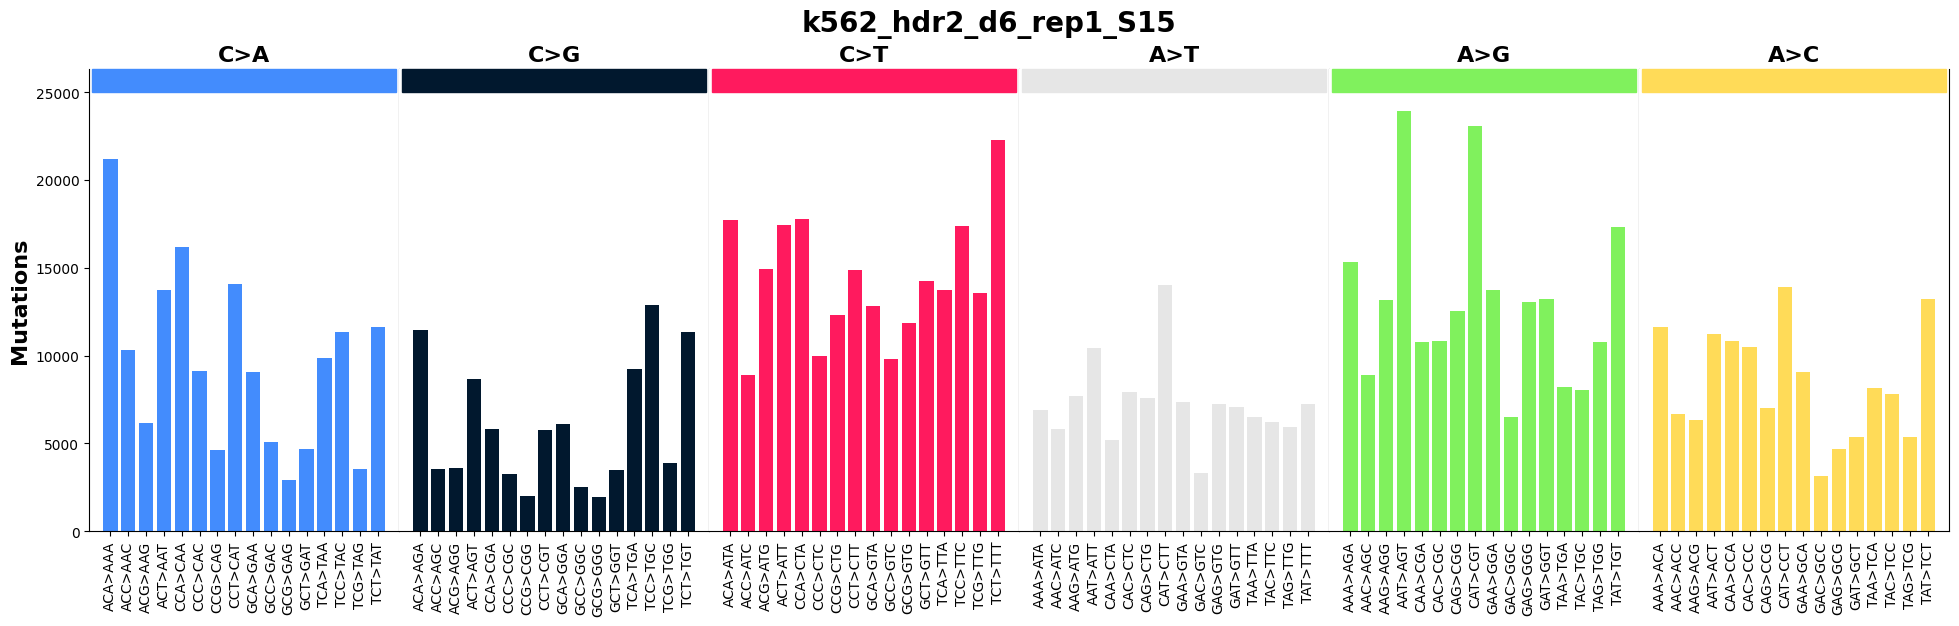

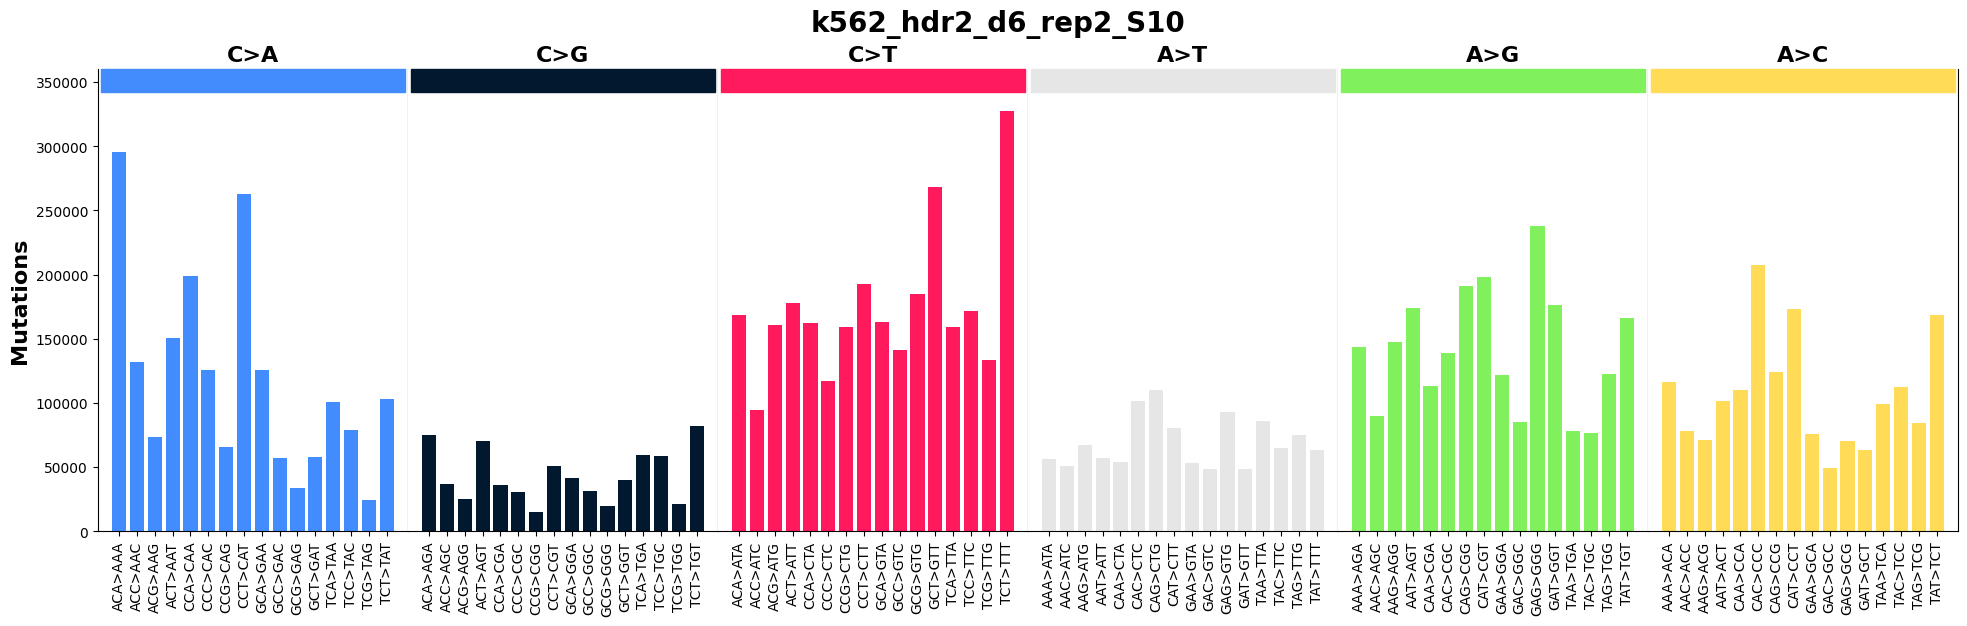

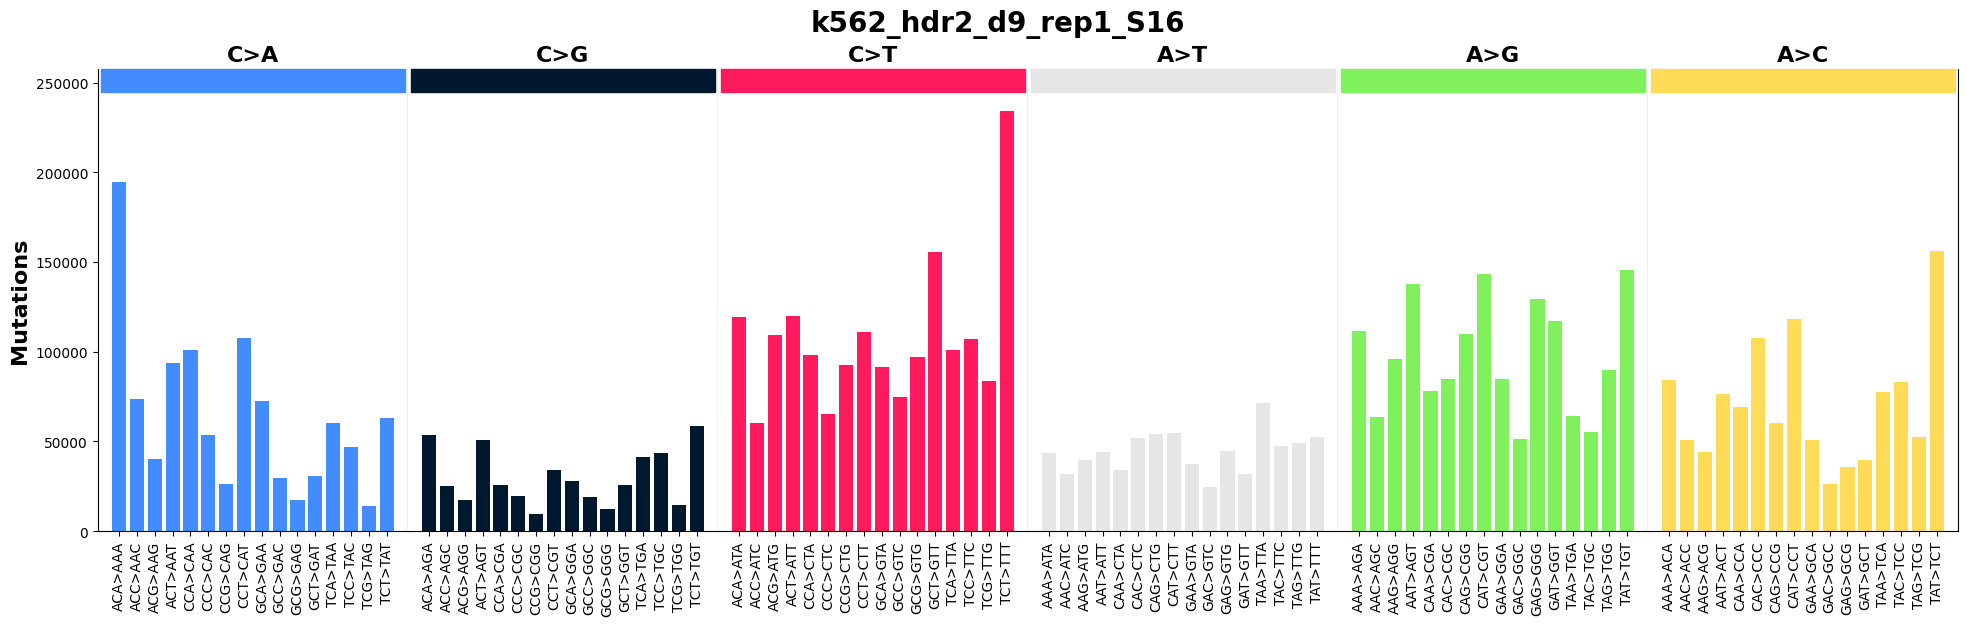

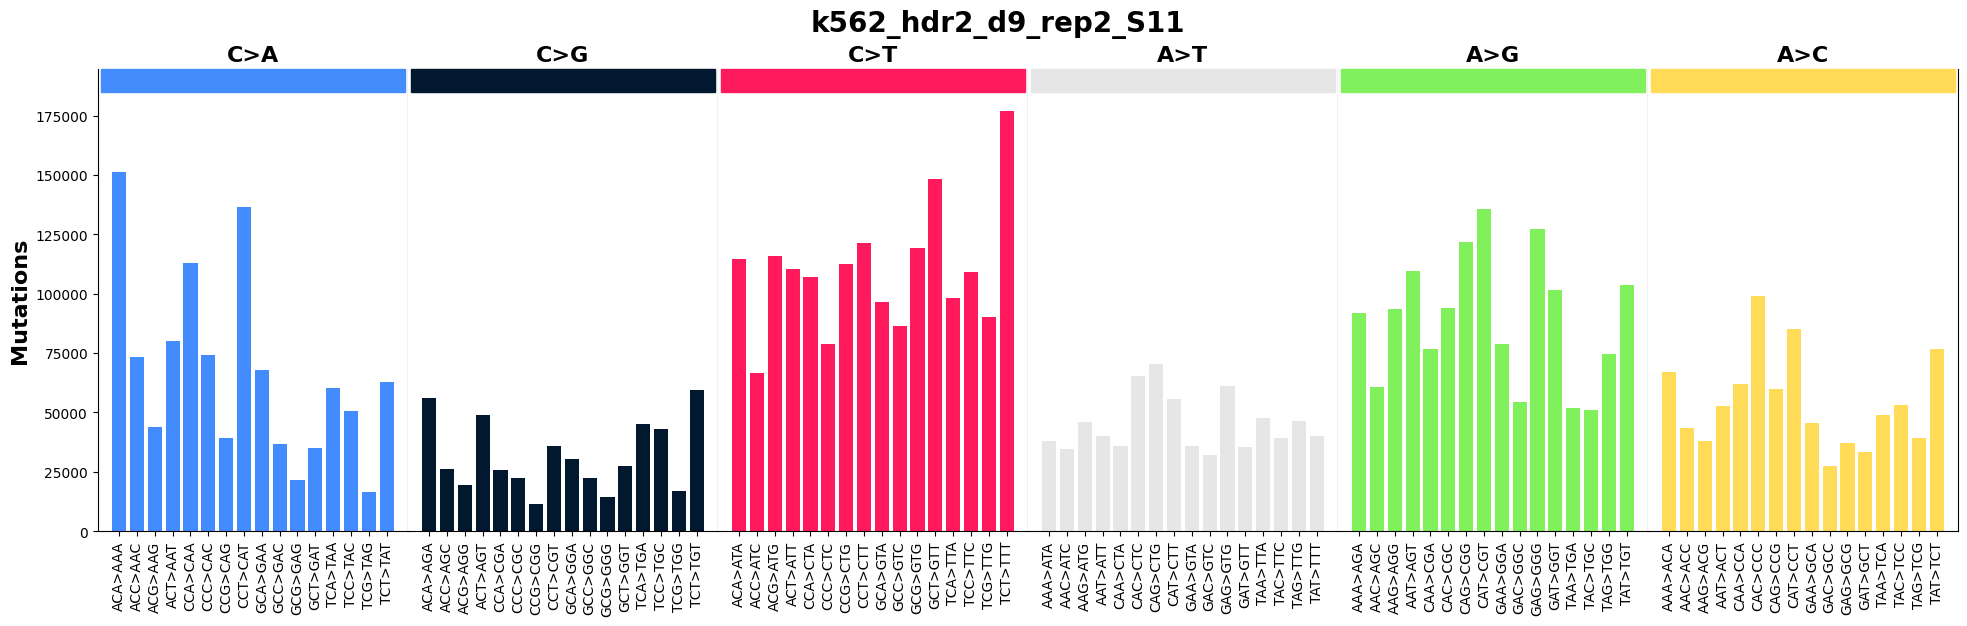

In [14]:
samples = spectra.index.to_list()
for sample in samples: 
    data = spectra.loc[sample]
    fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
    for i, ax in enumerate(axes):
        x = mut_types[titles[i]]
        ax.bar(x, data[x], color=hex_cols[i])
        ax.set_title(f"{titles[i]}",
                     fontweight='bold', 
                     fontsize=16
                    )
        ax.set_xticklabels(x,rotation=90)

        rect = patches.Rectangle(
            (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
            0.98, 0.05,     # Width and height (relative to axis coordinates)
            transform=ax.transAxes,  # Use axis coordinates
            color=hex_cols[i],         # Color of the patch
            clip_on=False            # Ensure the patch extends outside the axis
        )
        ax.add_patch(rect)
        ax.spines["top"].set_visible(False)
        ax.set_ylim(max(data))
        if i == 0:
            # Add y-axis label only to the first subplot
            ax.set_ylabel("Mutations", fontweight='bold', fontsize=16)
        else:
            # Remove the y-axis line and ticks for other subplots
            ax.yaxis.set_visible(False)
            ax.spines["left"].set_visible(False)

    axes[0].set_ylim(0, max(data)+0.1*max(data))
    fig.suptitle(os.path.basename(sample[:-4]),fontweight='bold', fontsize=20)
    fig.savefig(f'figures/ind_raw/{os.path.basename(sample[:-4])}.png', dpi=600, bbox_inches='tight')

### Norm

/loc/scratch/21406449/ipykernel_15623/1047139823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/1047139823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/1047139823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/1047139823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/1047139823.py:12: UserWarning: set_ticklabels() should only be used with a fixed n

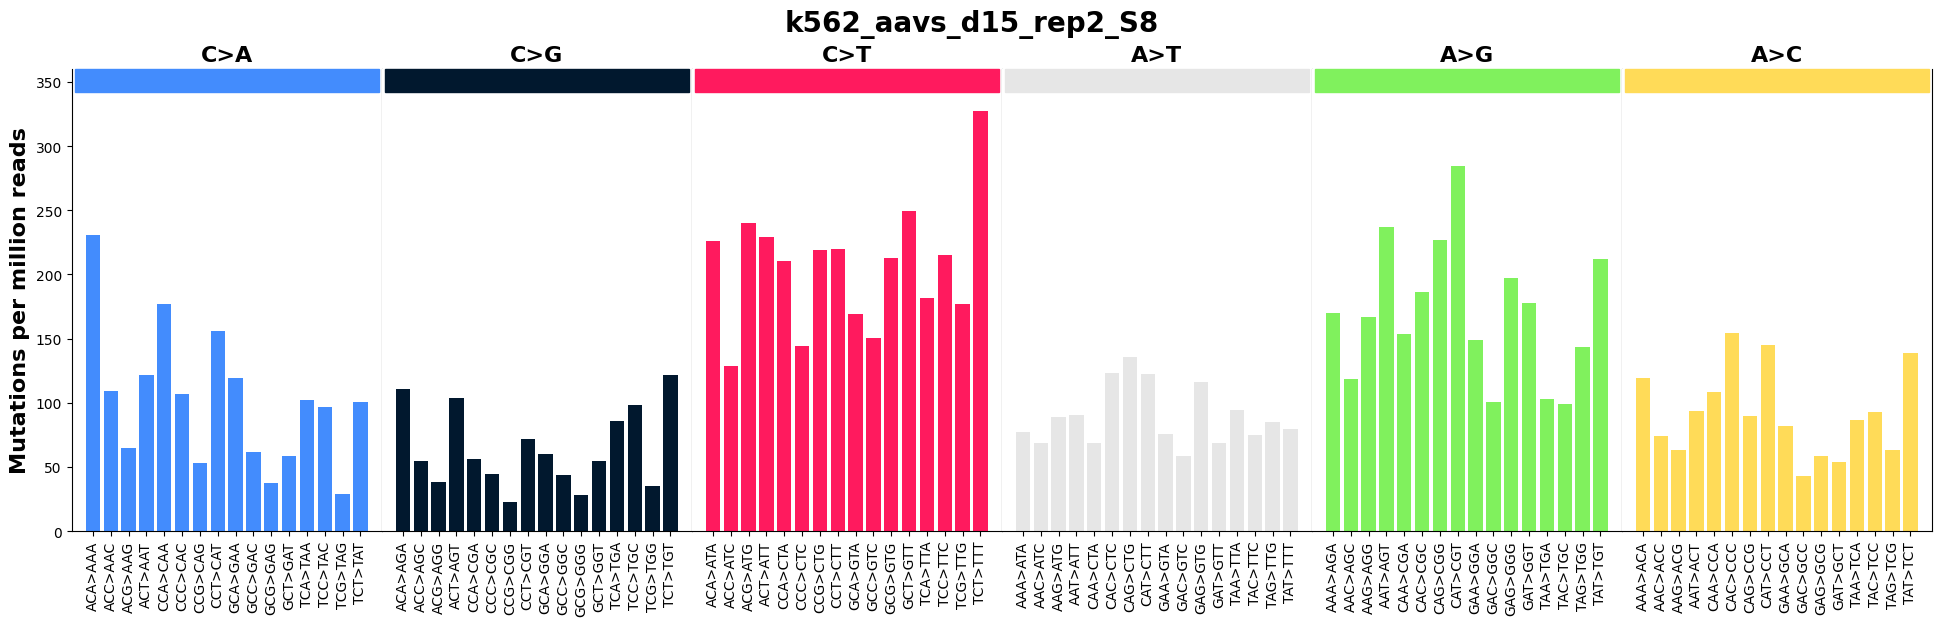

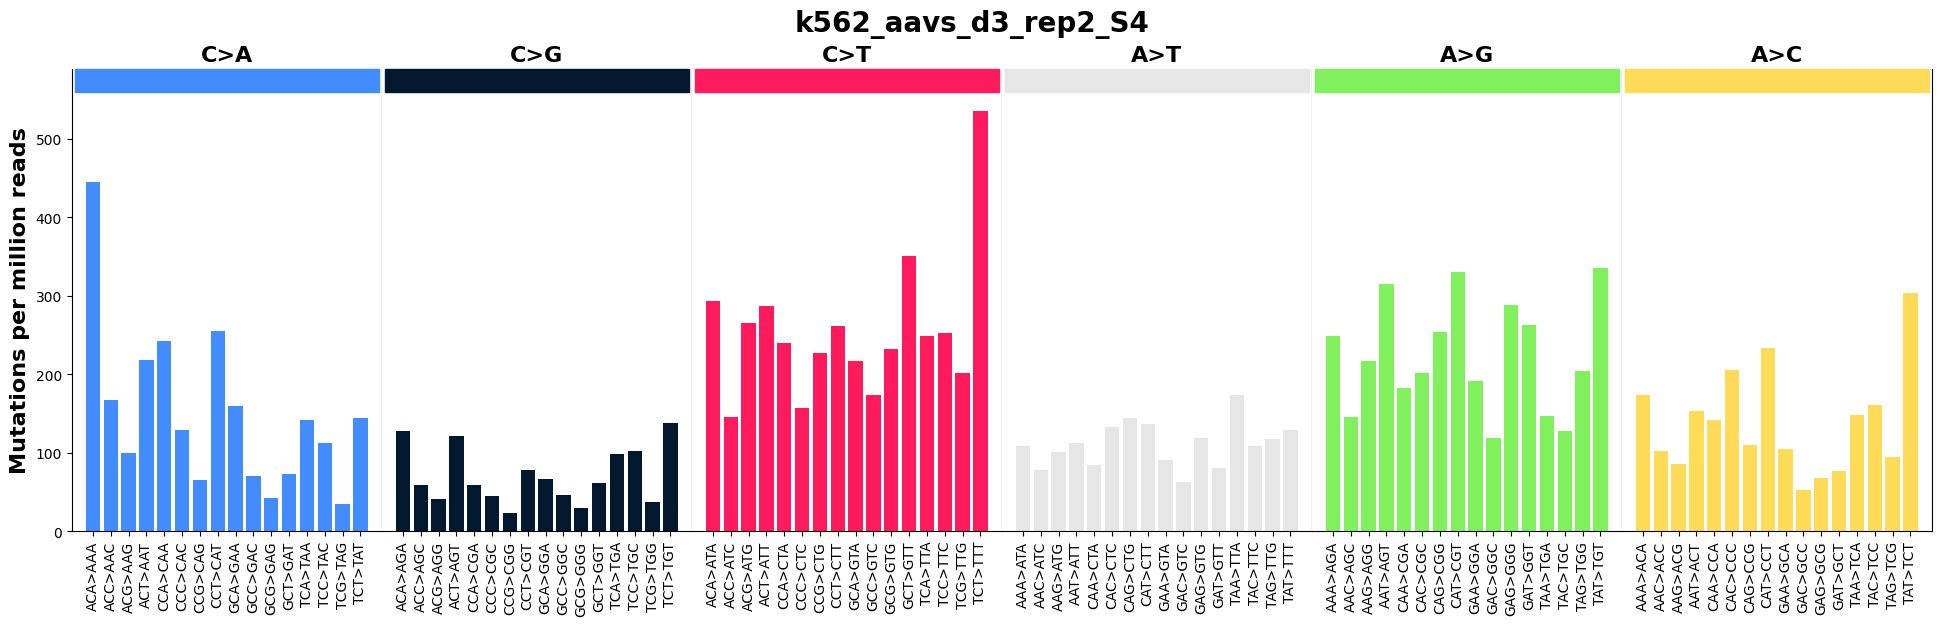

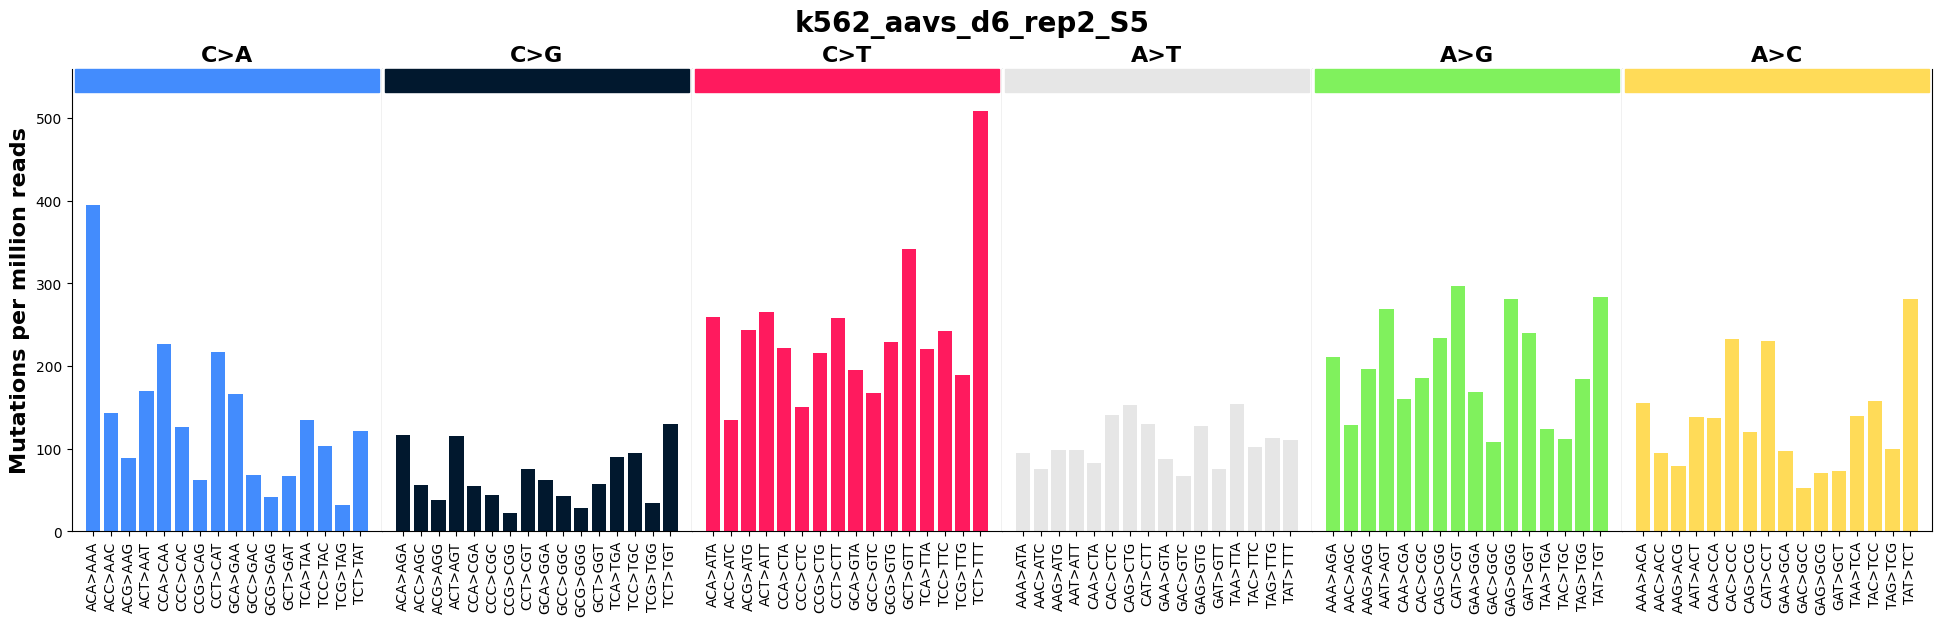

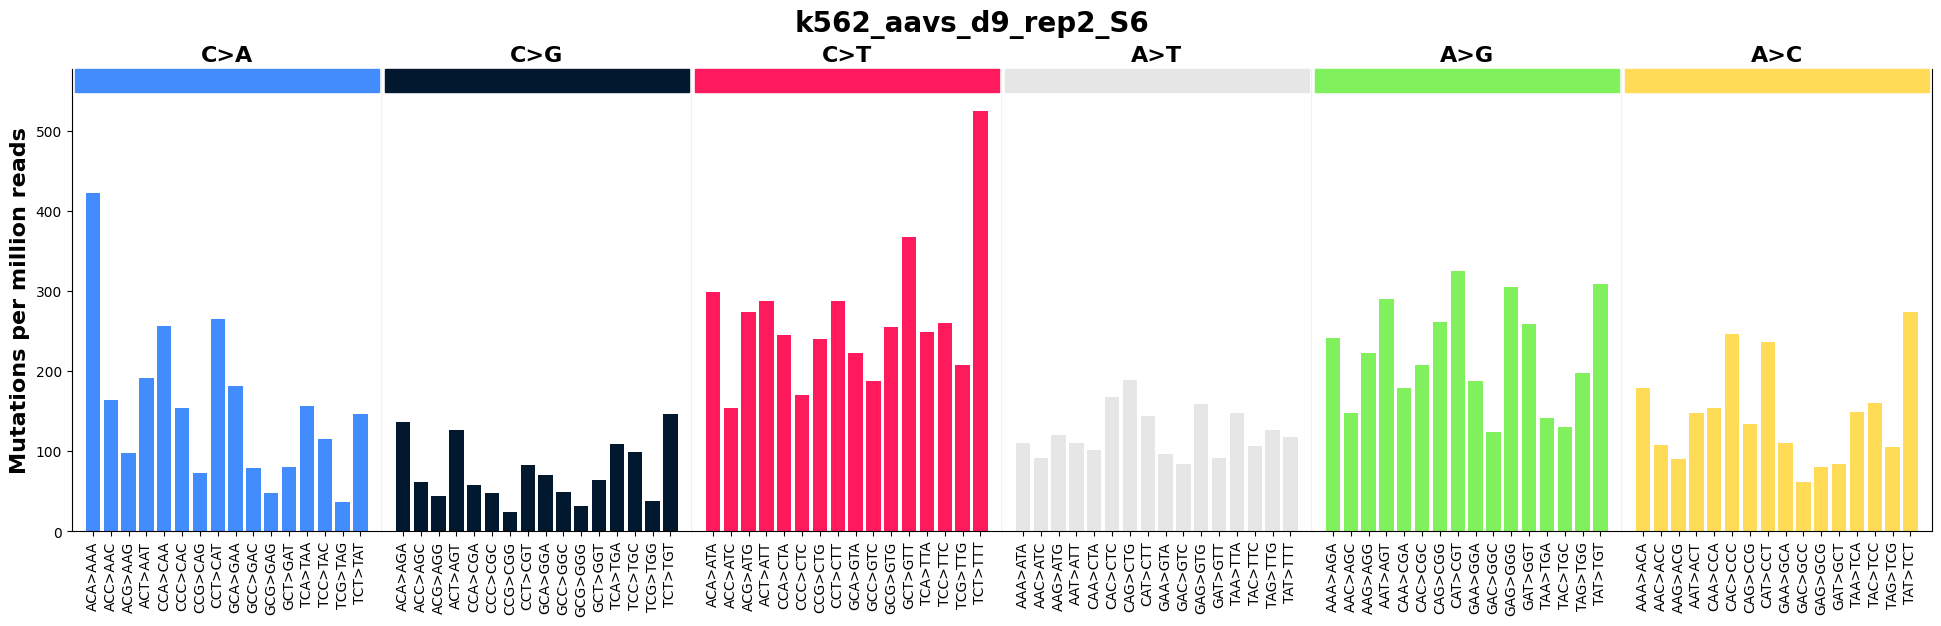

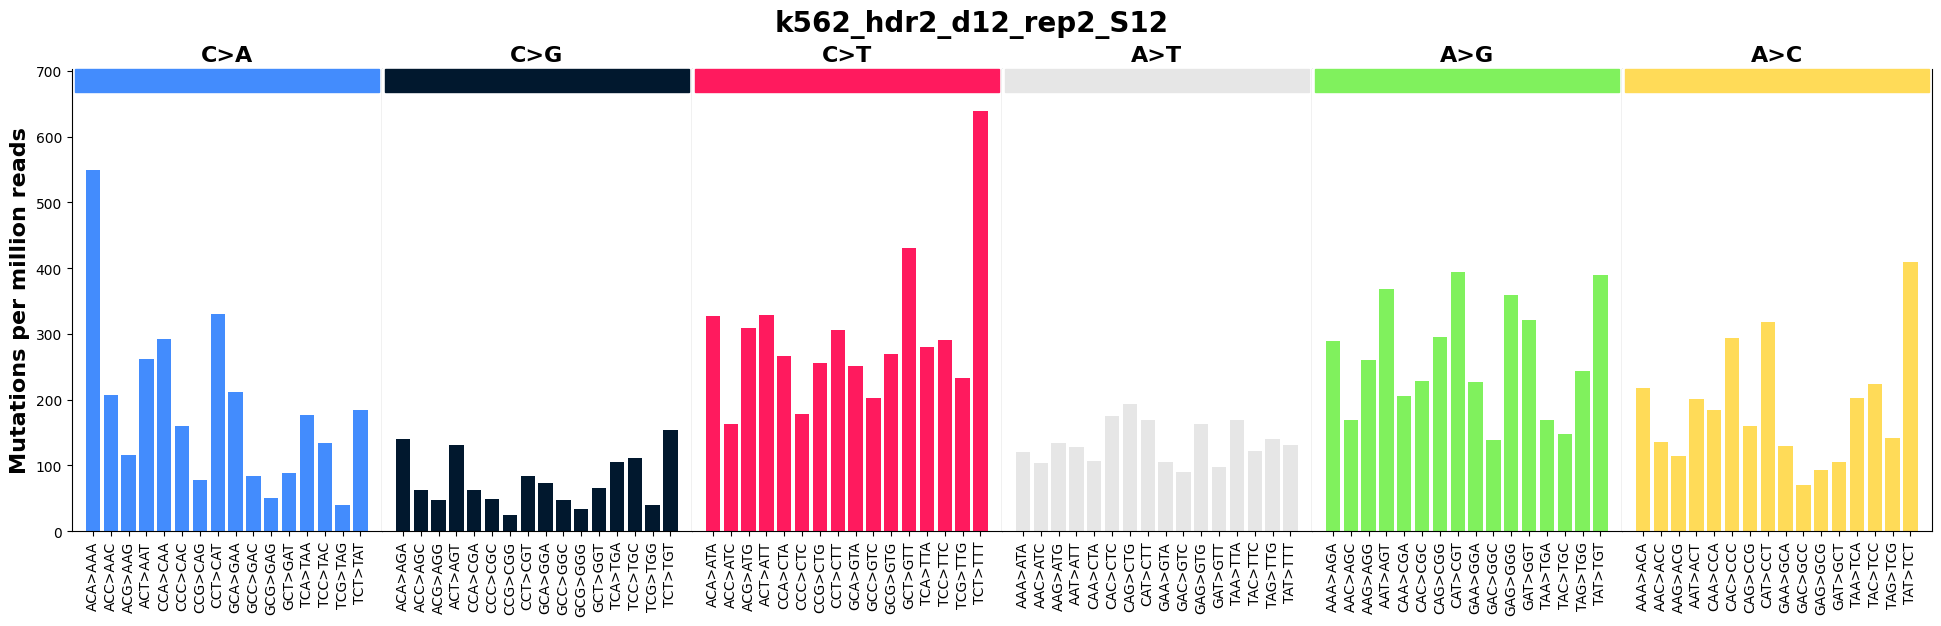

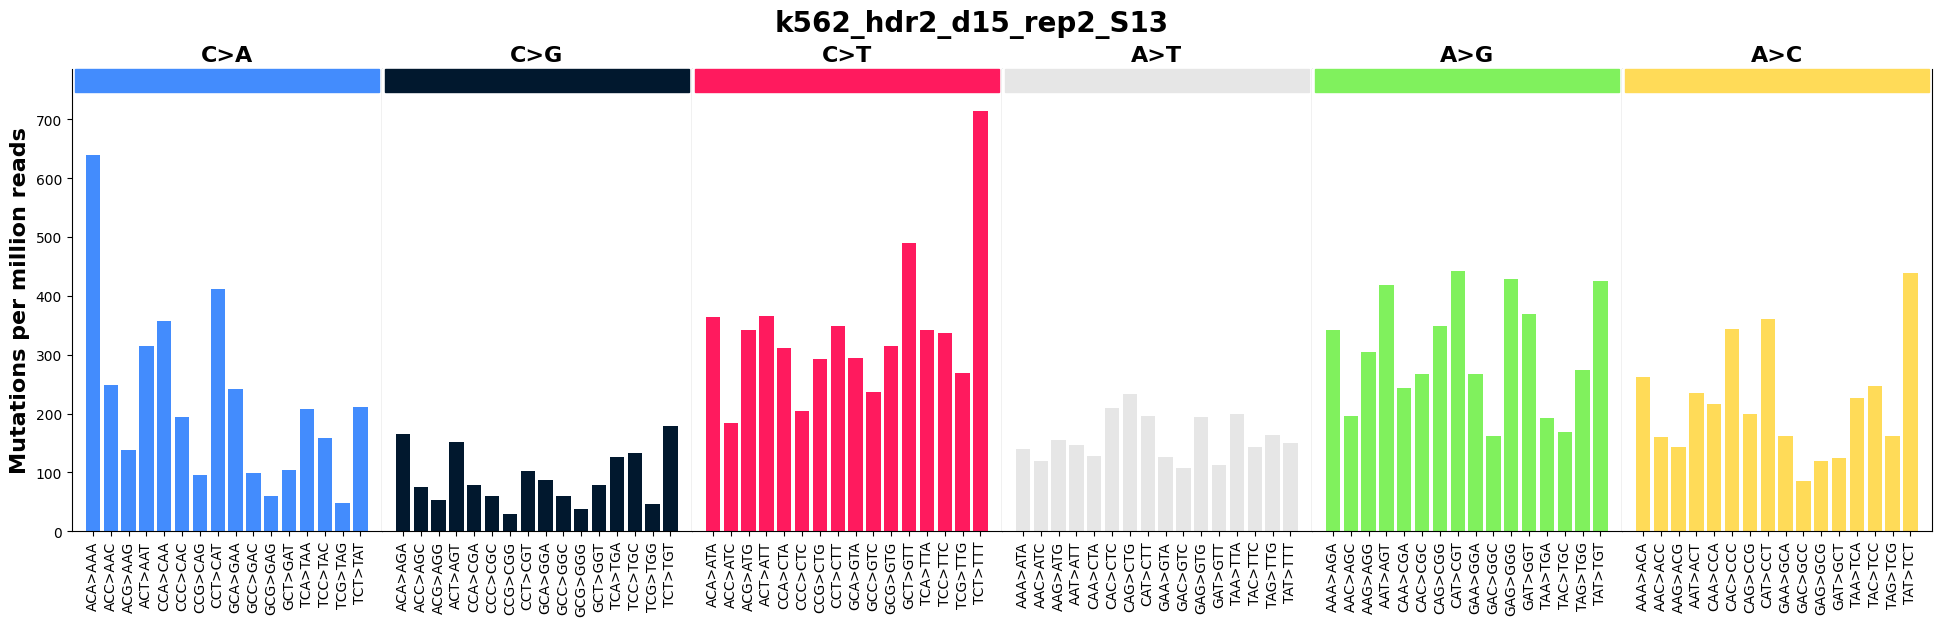

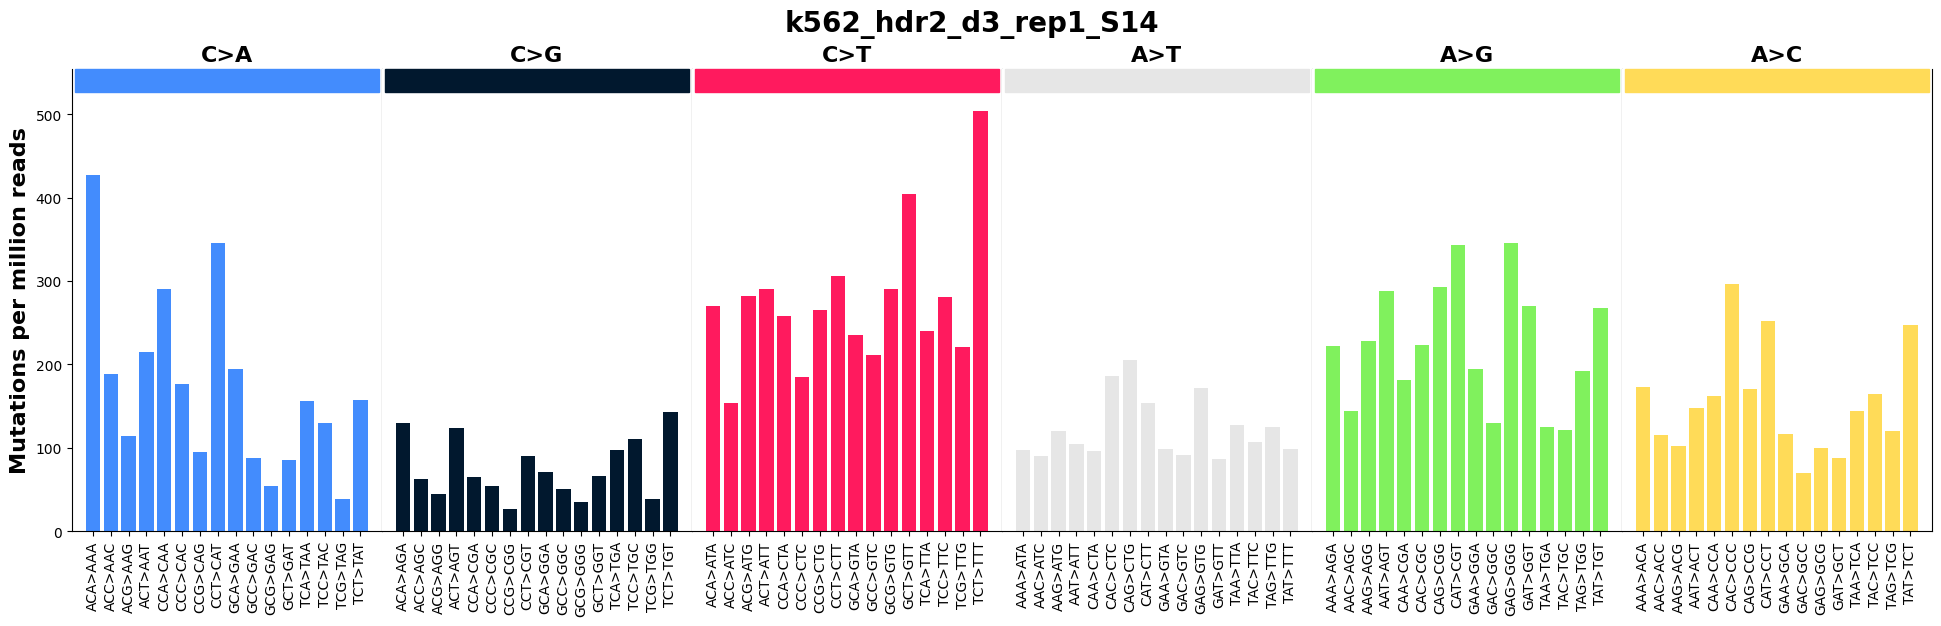

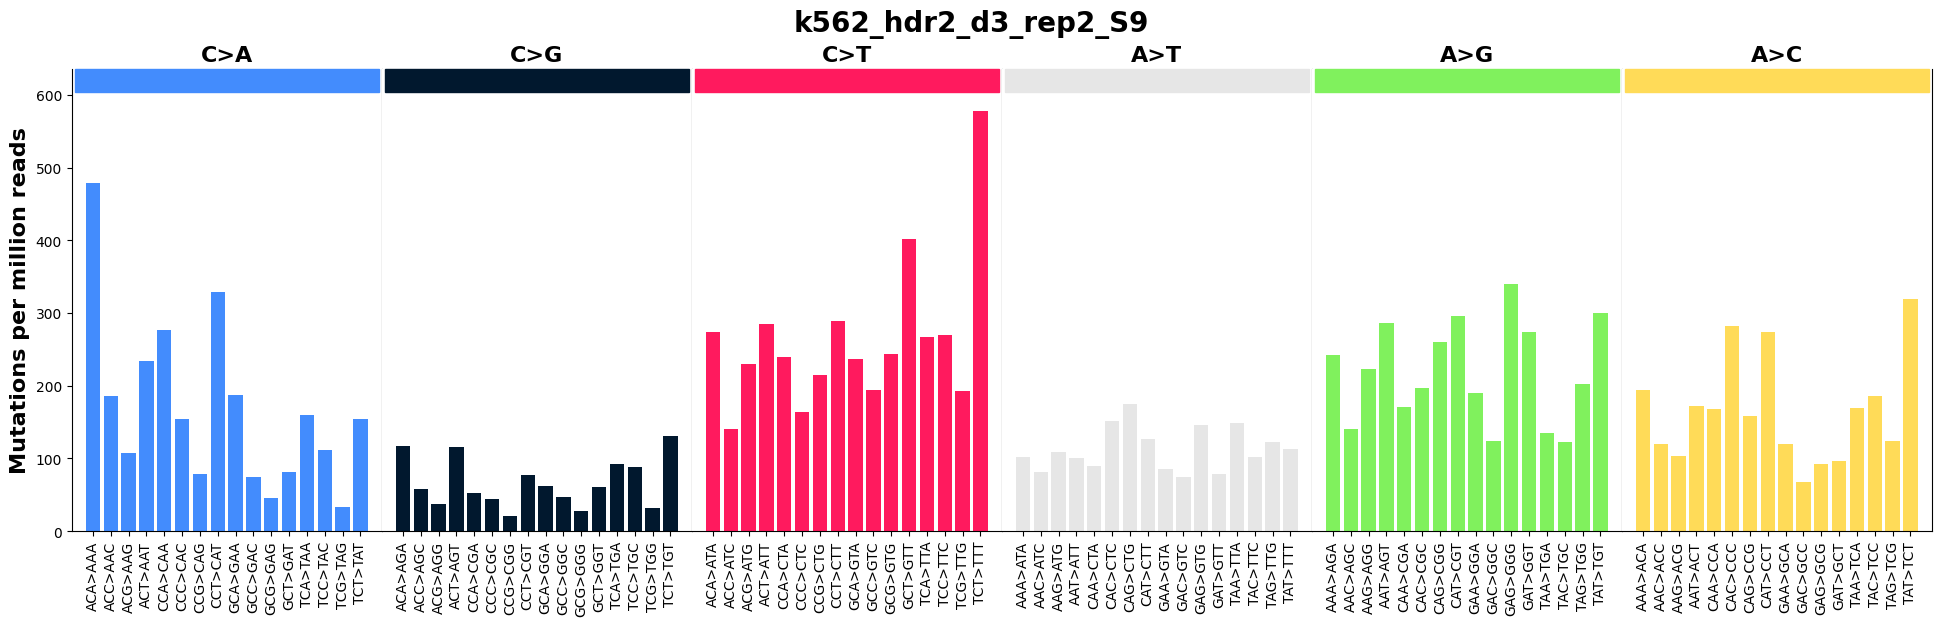

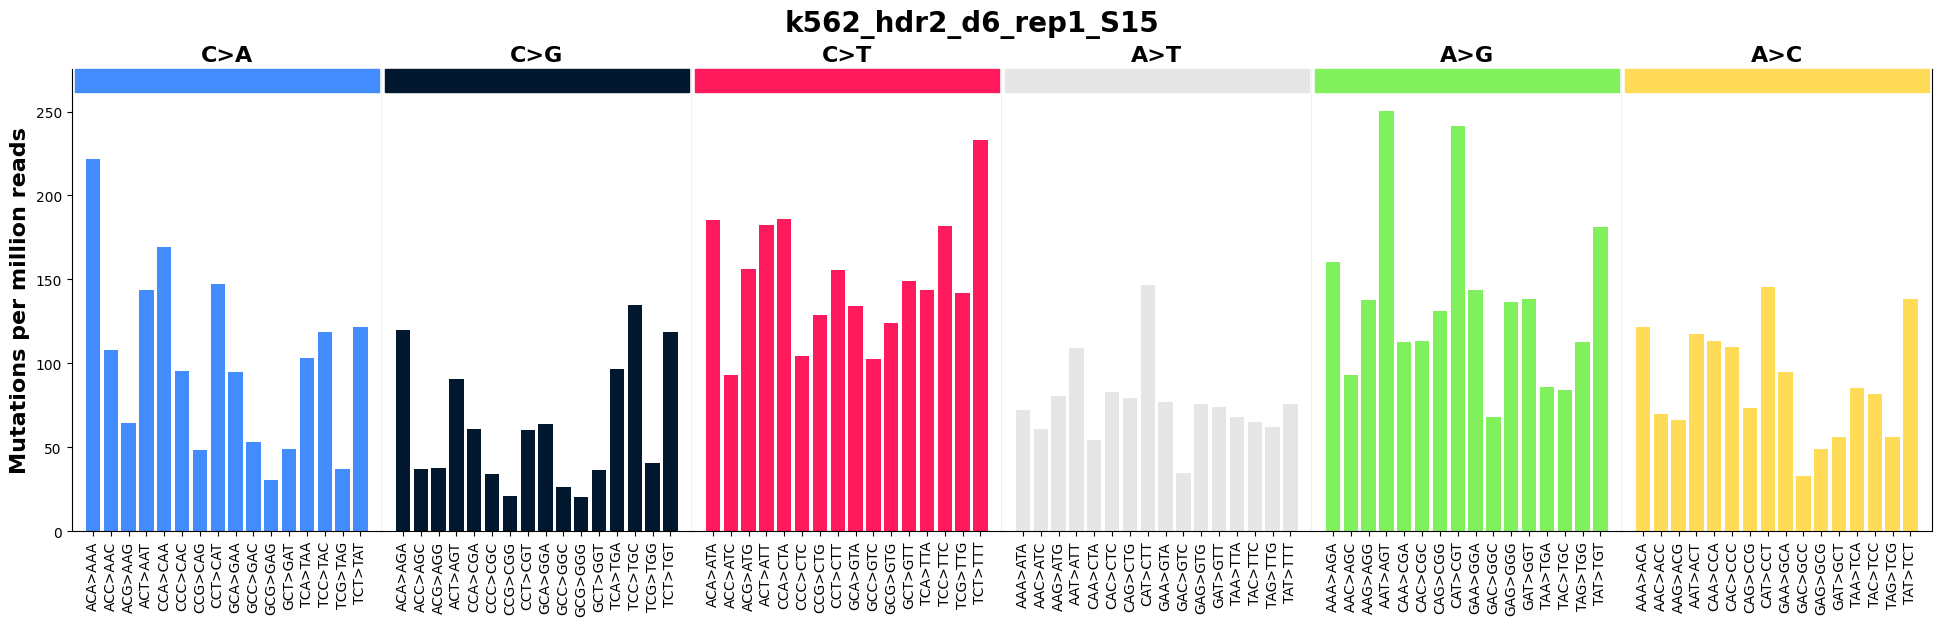

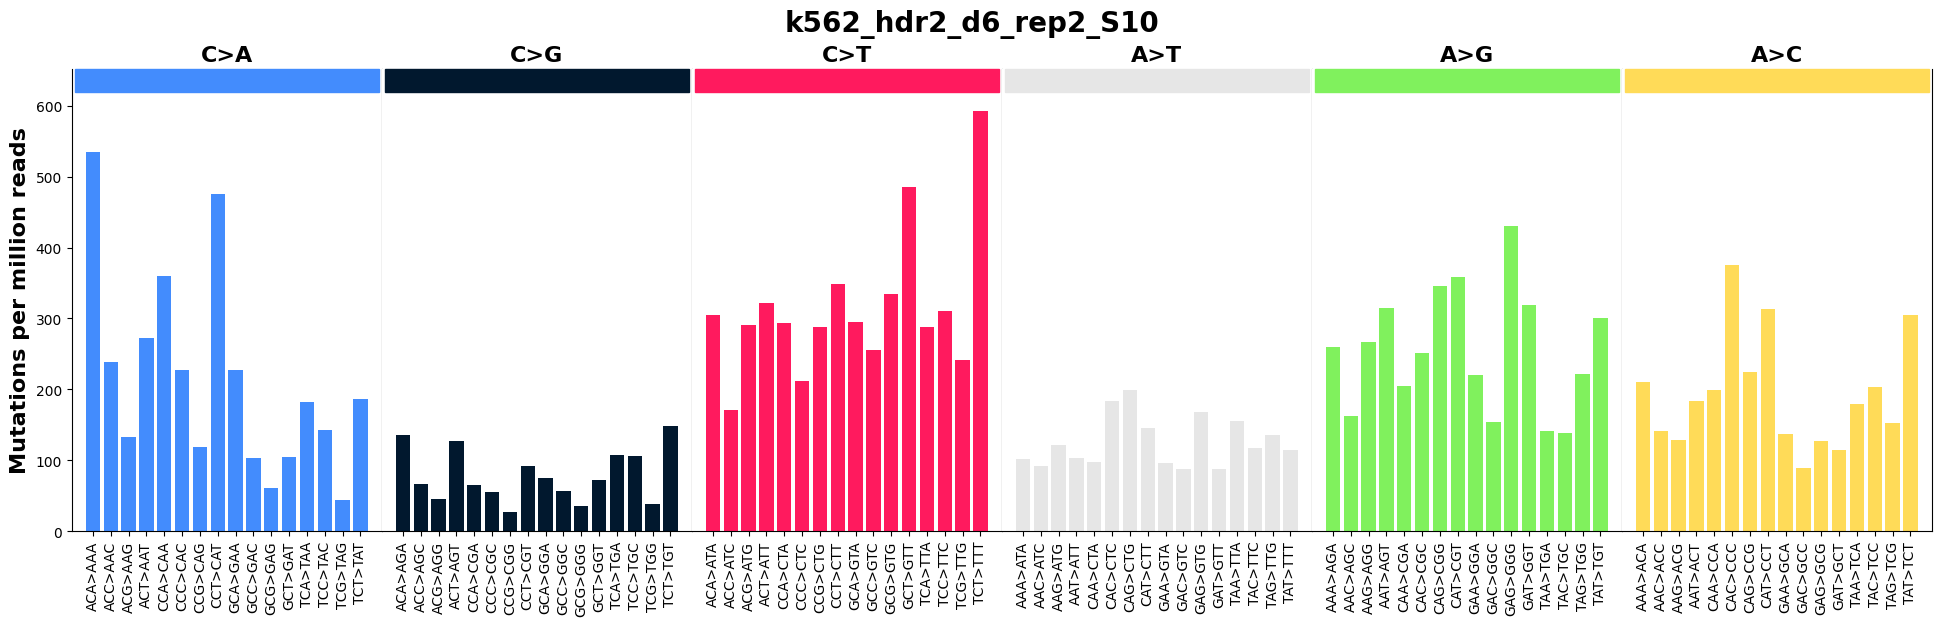

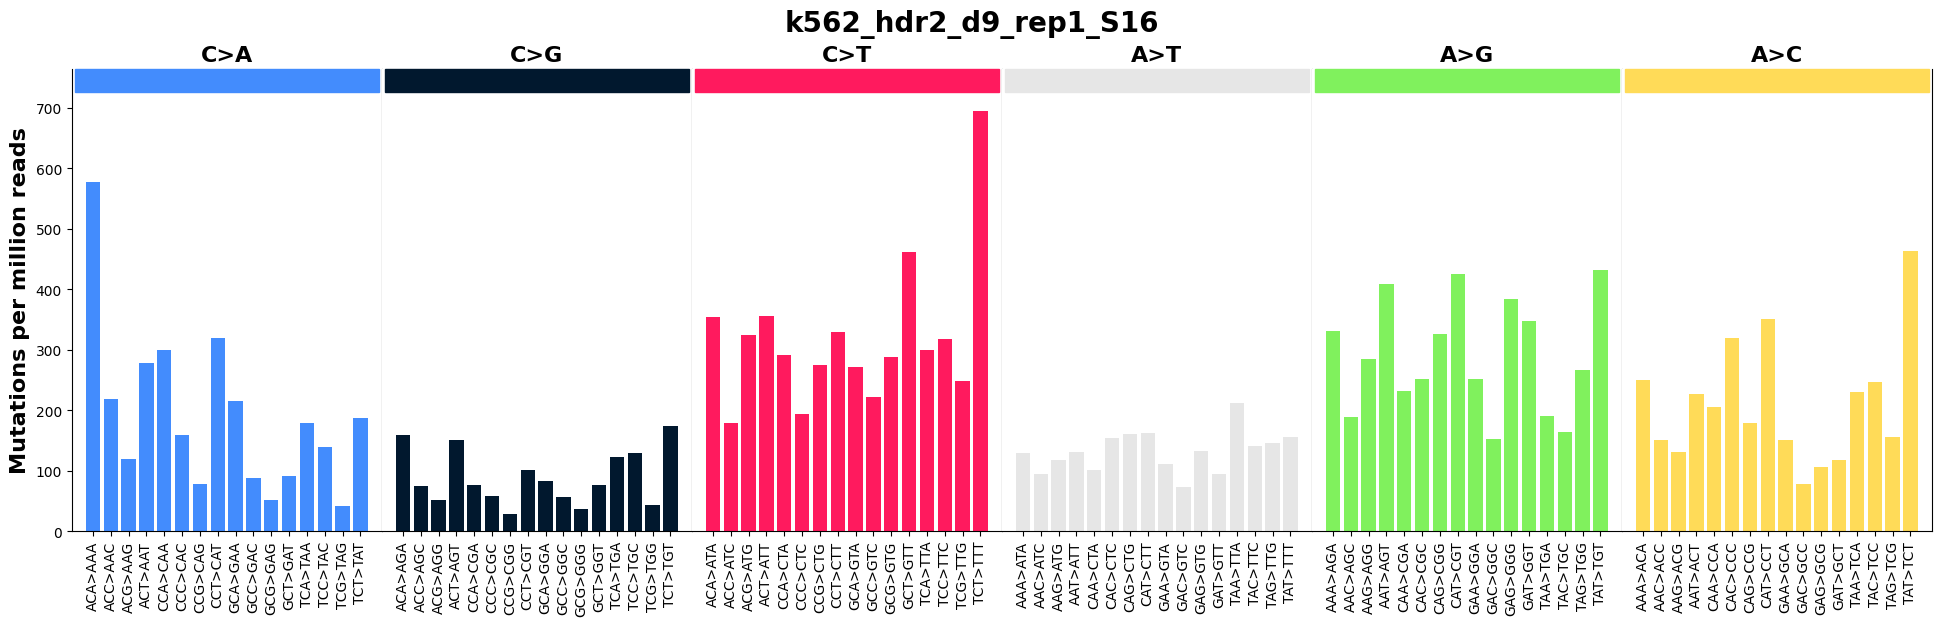

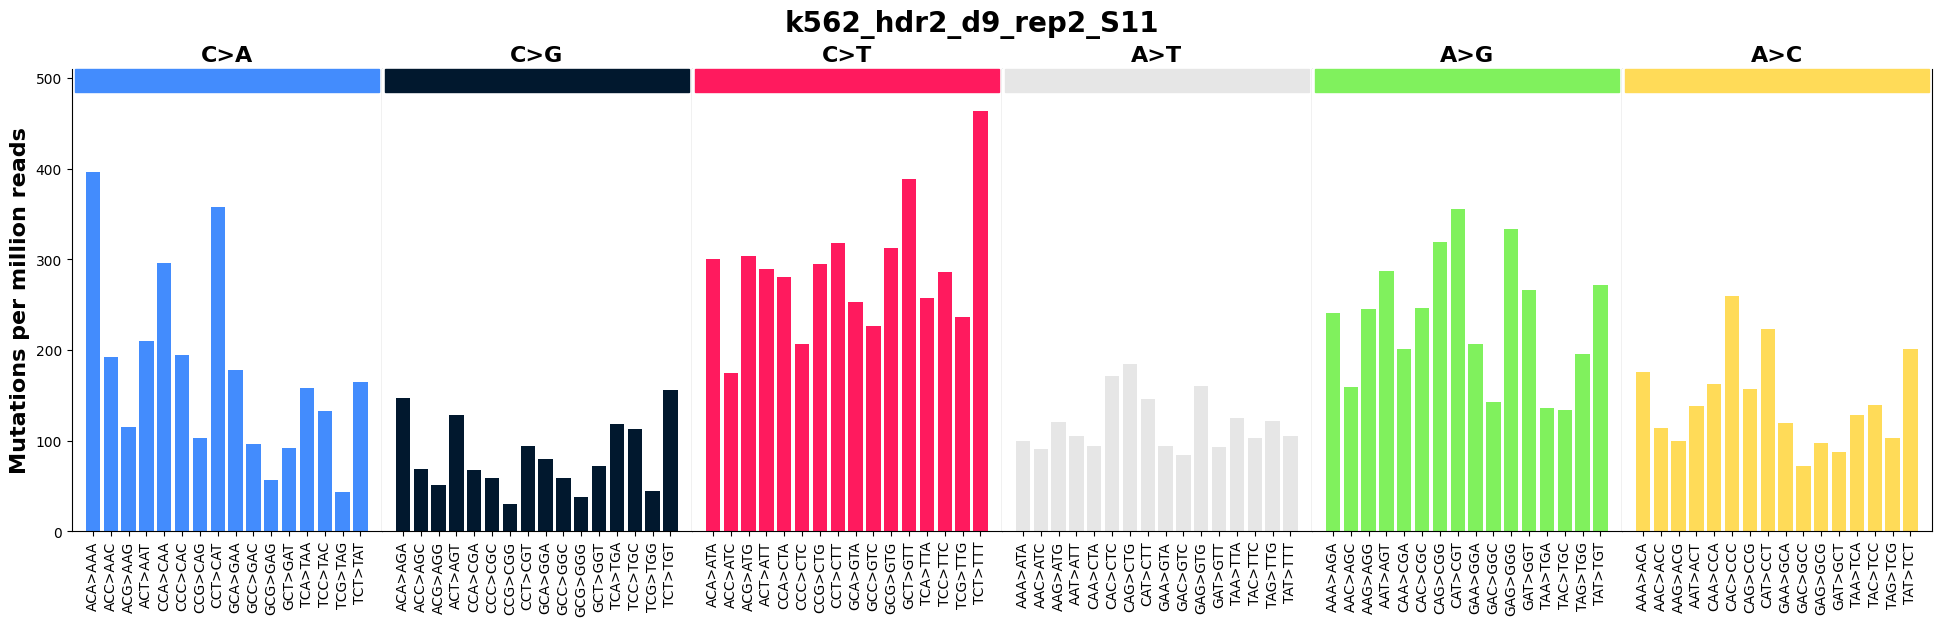

In [15]:
samples = spectra.index.to_list()
for sample in samples: 
    data = spectra_norm.loc[sample]
    fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
    for i, ax in enumerate(axes):
        x = mut_types[titles[i]]
        ax.bar(x, data[x], color=hex_cols[i])
        ax.set_title(f"{titles[i]}",
                     fontweight='bold', 
                     fontsize=16
                    )
        ax.set_xticklabels(x,rotation=90)

        rect = patches.Rectangle(
            (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
            0.98, 0.05,     # Width and height (relative to axis coordinates)
            transform=ax.transAxes,  # Use axis coordinates
            color=hex_cols[i],         # Color of the patch
            clip_on=False            # Ensure the patch extends outside the axis
        )
        ax.add_patch(rect)
        ax.spines["top"].set_visible(False)
        ax.set_ylim(spectra_norm.values.max()+0.1*spectra_norm.values.max())
        if i == 0:
            # Add y-axis label only to the first subplot
            ax.set_ylabel("Mutations per million reads", fontweight='bold', fontsize=16)
        else:
            # Remove the y-axis line and ticks for other subplots
            ax.yaxis.set_visible(False)
            ax.spines["left"].set_visible(False)

    axes[0].set_ylim(0, max(data)+0.1*max(data))
    fig.suptitle(os.path.basename(sample[:-4]),fontweight='bold', fontsize=20)
    fig.savefig(f'figures/ind_norm/{os.path.basename(sample[:-4])}.png', dpi=600, bbox_inches='tight')

## Grouped

### HDR2 vs AAVS

In [16]:
HDR2 = [s for s in samples if 'hdr2' in s]
AAVS = [s for s in samples if 'aavs' in s]

HDR2_spectra = spectra.loc[HDR2].sum()
AAVS_spectra = spectra.loc[AAVS].sum()

HDR2_spectra_norm = (HDR2_spectra / int(site_counts.loc[HDR2].sum())) * 1000000
AAVS_spectra_norm = (AAVS_spectra / int(site_counts.loc[AAVS].sum())) * 1000000

difference_norm = HDR2_spectra_norm - AAVS_spectra_norm
difference = HDR2_spectra - AAVS_spectra

/loc/scratch/21406449/ipykernel_15623/2303650859.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  HDR2_spectra_norm = (HDR2_spectra / int(read_counts.loc[HDR2].sum())) * 1000000
/loc/scratch/21406449/ipykernel_15623/2303650859.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  AAVS_spectra_norm = (AAVS_spectra / int(read_counts.loc[AAVS].sum())) * 1000000


/loc/scratch/21406449/ipykernel_15623/3004994531.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3004994531.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3004994531.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3004994531.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3004994531.py:10: UserWarning: set_ticklabels() should only be used with a fixed n

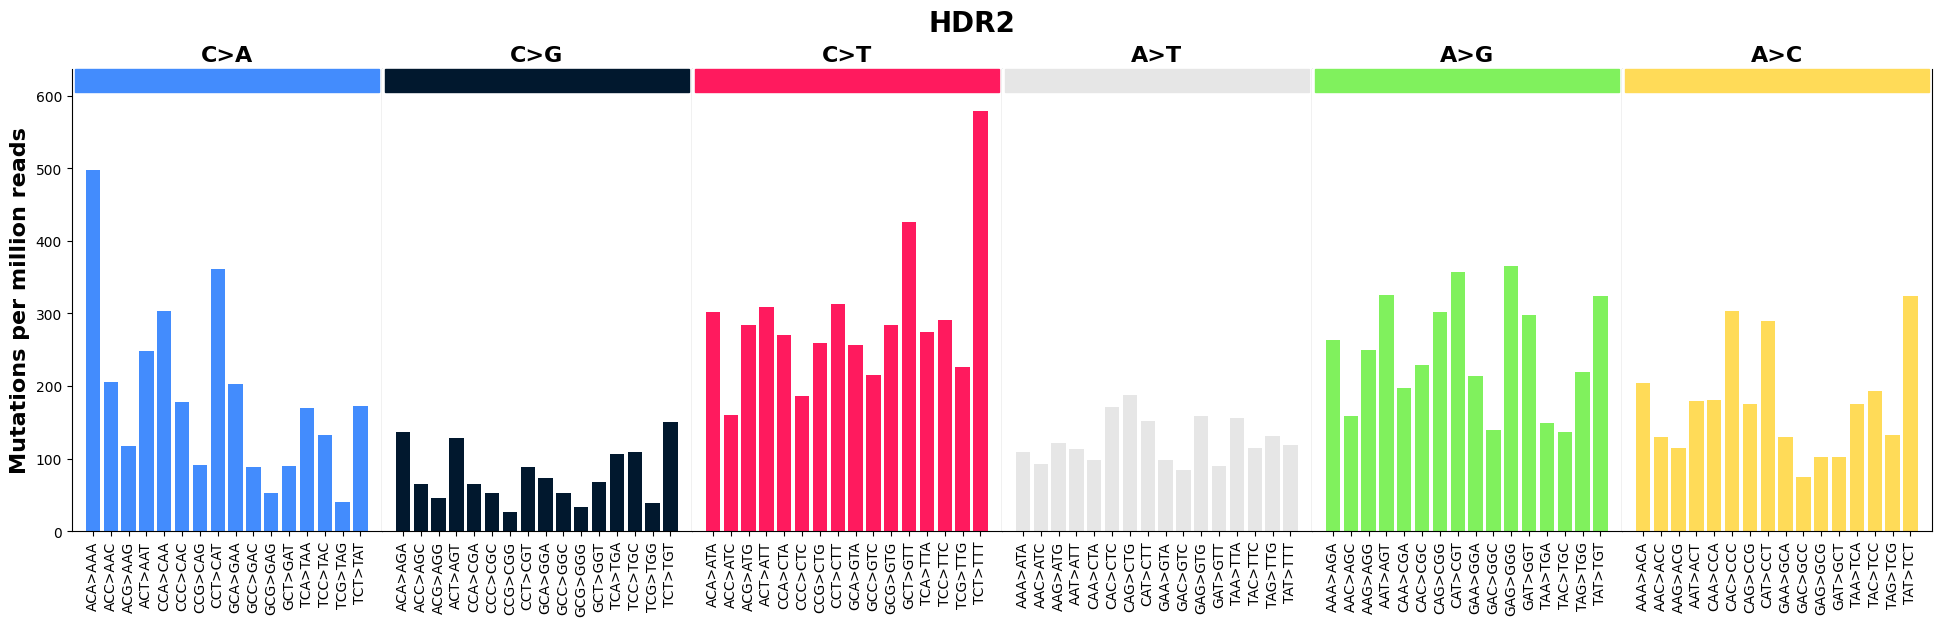

In [17]:
data = HDR2_spectra_norm
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations per million reads", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(0, max(data)+0.1*max(data))
# axes[0].set_ylim(0, 350)
fig.suptitle("HDR2",fontweight='bold', fontsize=20)
fig.savefig('figures/HDR2_spectra_norm.png', dpi=600, bbox_inches='tight')

/loc/scratch/21406449/ipykernel_15623/3905029834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3905029834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3905029834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3905029834.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3905029834.py:10: UserWarning: set_ticklabels() should only be used with a fixed n

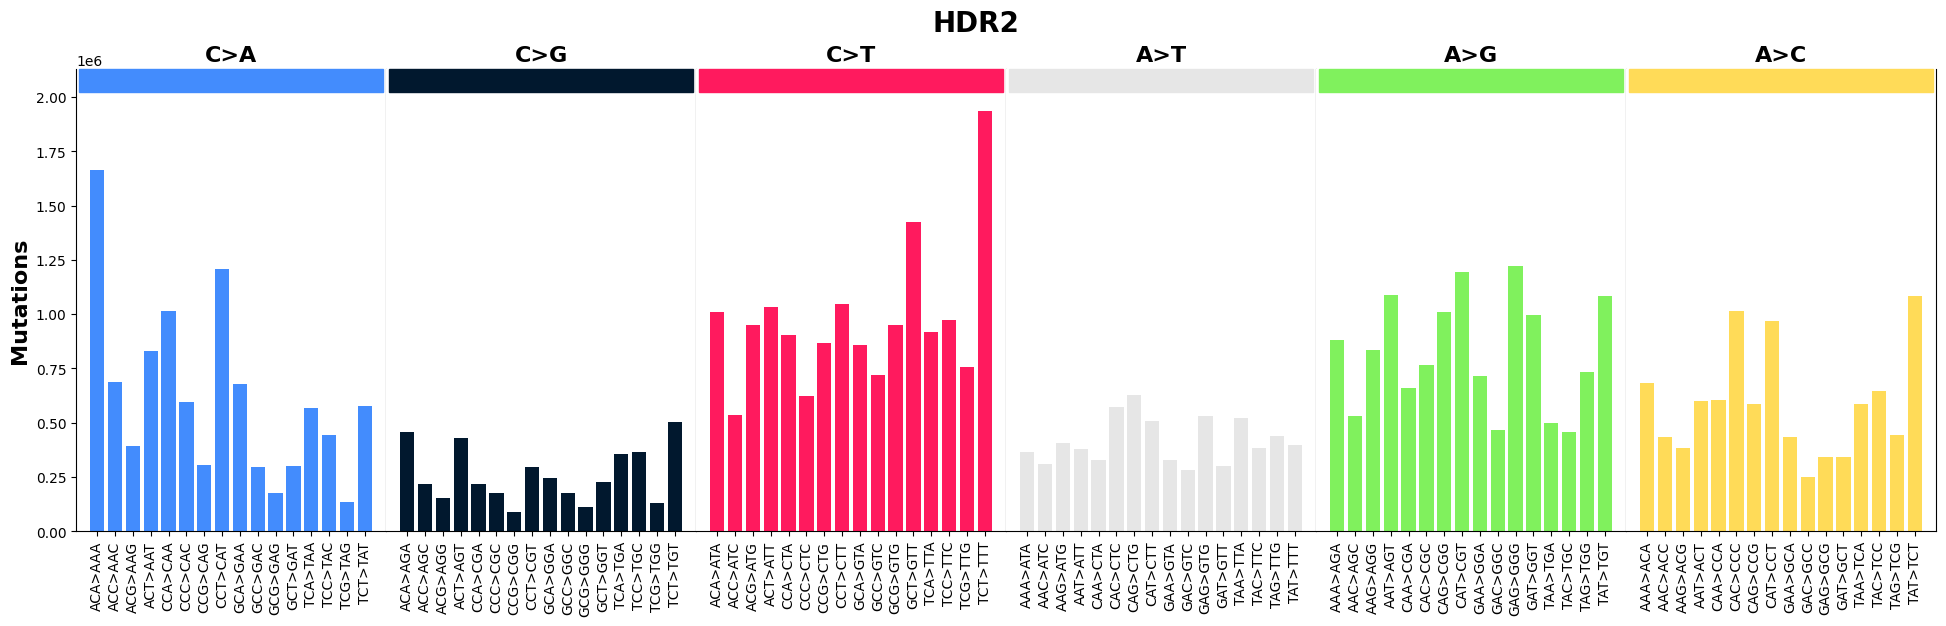

In [18]:
data = HDR2_spectra
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(0, max(data)+0.1*max(data))
# axes[0].set_ylim(0, 350)
fig.suptitle("HDR2",fontweight='bold', fontsize=20)
fig.savefig('figures/HDR2_spectra.png', dpi=600, bbox_inches='tight')

/loc/scratch/21406449/ipykernel_15623/483260983.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/483260983.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/483260983.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/483260983.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/483260983.py:10: UserWarning: set_ticklabels() should only be used with a fixed number

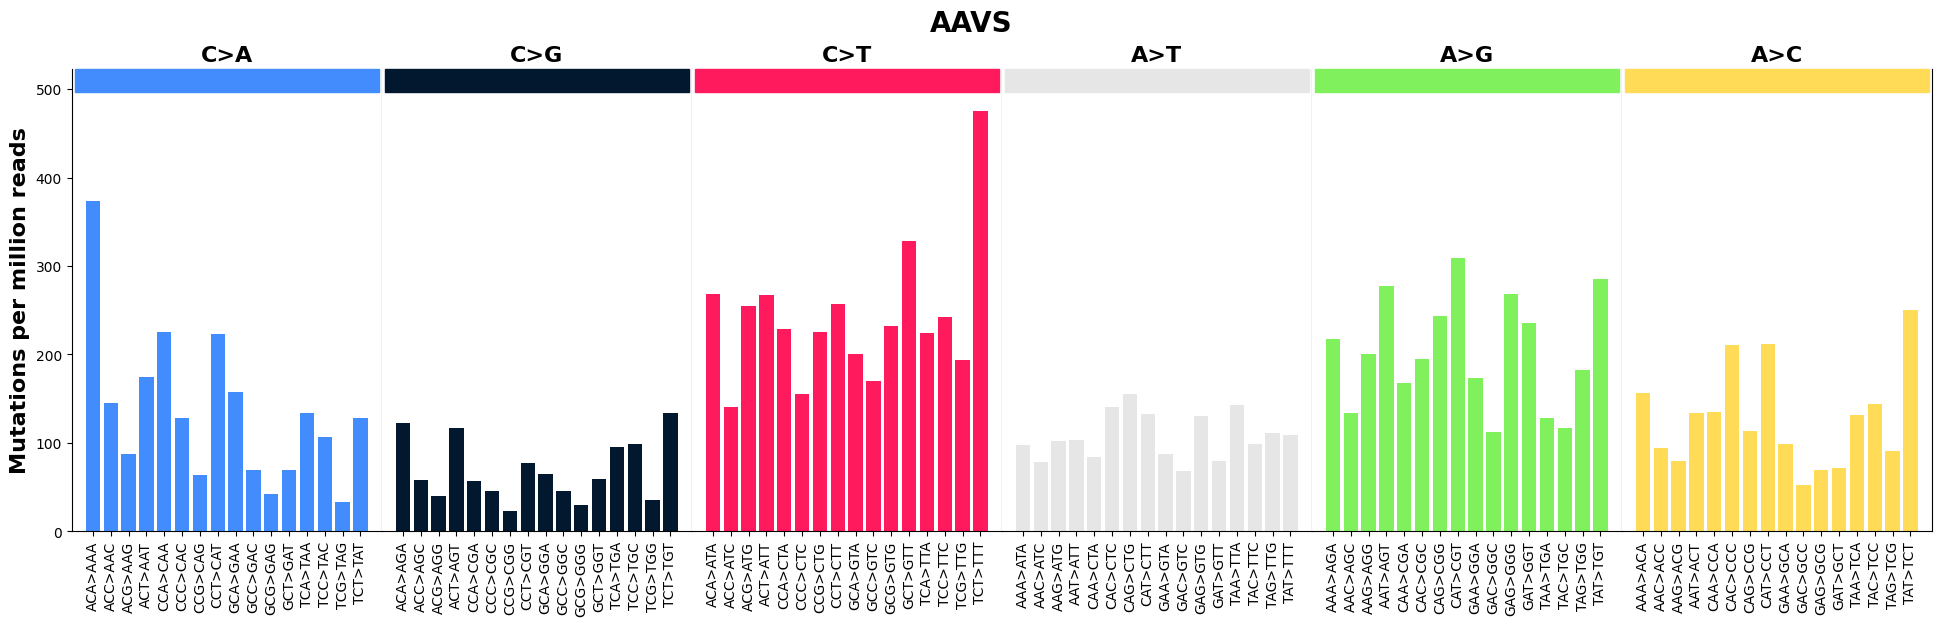

In [19]:
data = AAVS_spectra_norm
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations per million reads", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(0, max(data)+0.1*max(data))
# axes[0].set_ylim(0,350)
fig.suptitle("AAVS",fontweight='bold', fontsize=20)
fig.savefig(f'figures/AAVS_spectra_norm.png', dpi=600, bbox_inches='tight')

/loc/scratch/21406449/ipykernel_15623/3867090939.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3867090939.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3867090939.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3867090939.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/3867090939.py:10: UserWarning: set_ticklabels() should only be used with a fixed n

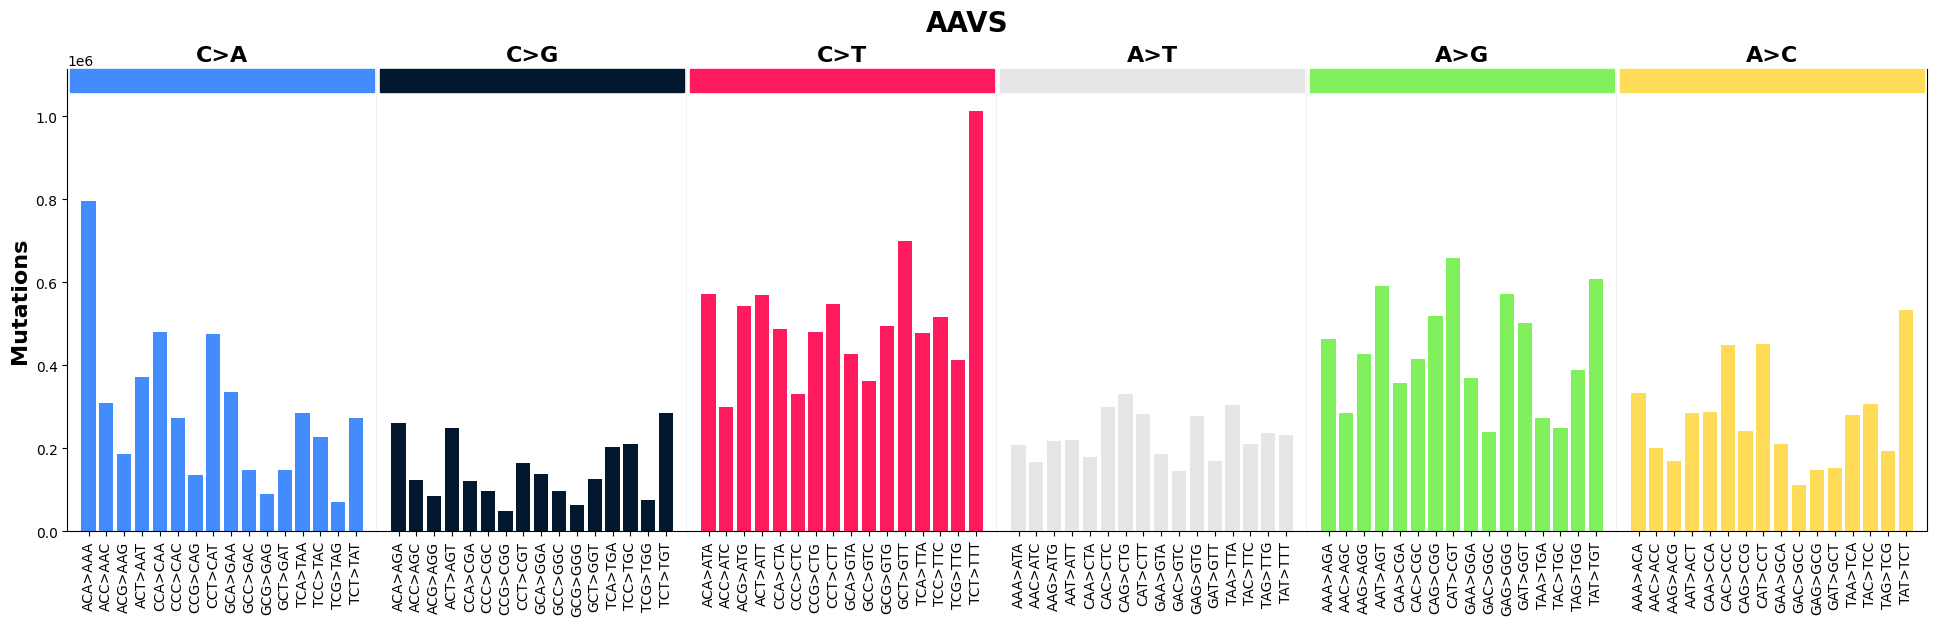

In [20]:
data = AAVS_spectra
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(0, max(data)+0.1*max(data))
# axes[0].set_ylim(0,350)
fig.suptitle("AAVS",fontweight='bold', fontsize=20)
fig.savefig(f'figures/AAVS_spectra.png', dpi=600, bbox_inches='tight')

/loc/scratch/21406449/ipykernel_15623/2787531570.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2787531570.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2787531570.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2787531570.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/2787531570.py:10: UserWarning: set_ticklabels() should only be used with a fixed n

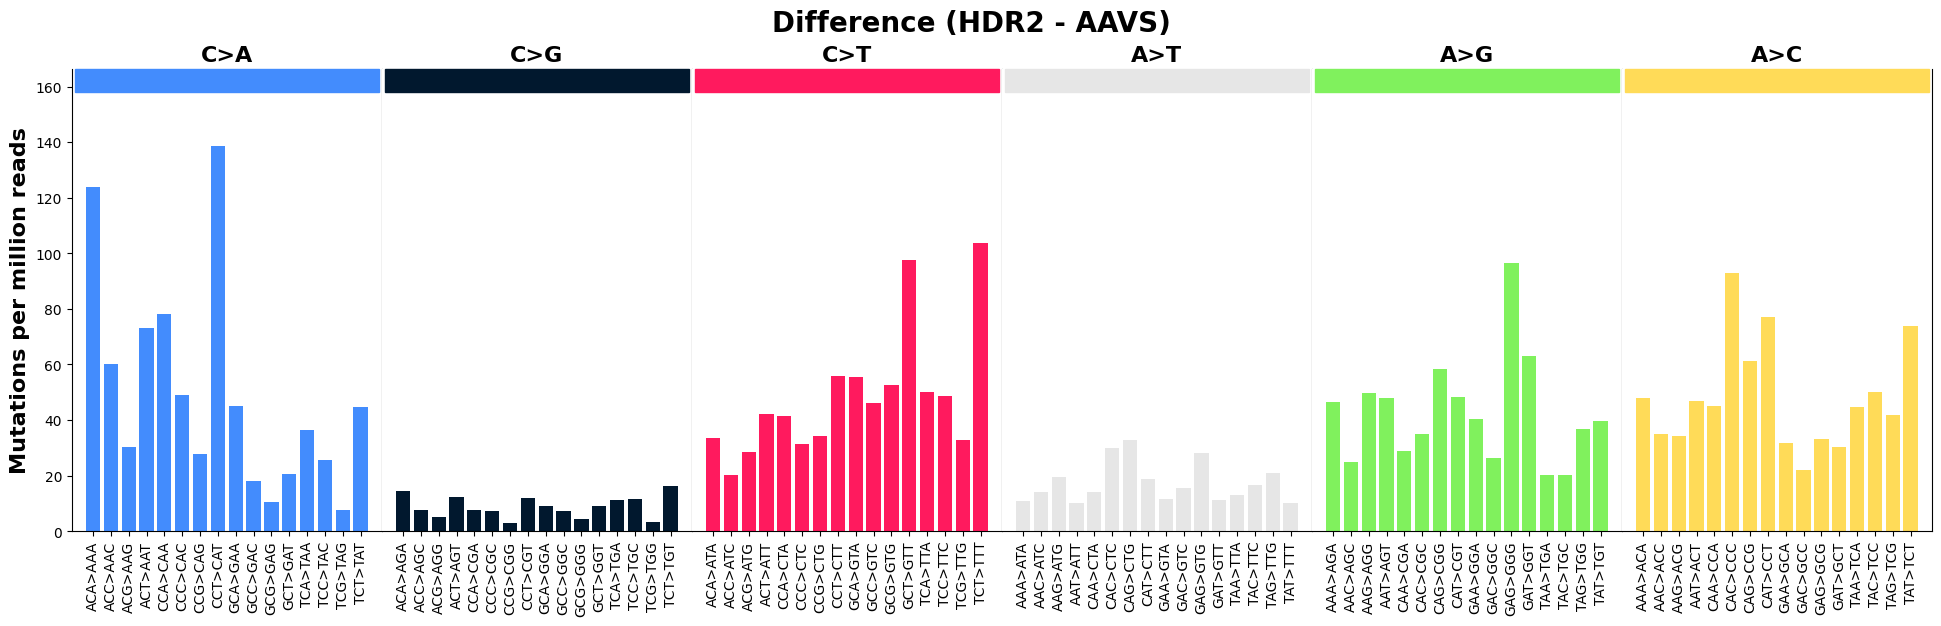

In [21]:
data = difference_norm
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations per million reads", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(min(data)+0.1*min(data), max(data)+0.2*max(data))
# axes[0].set_ylim(0,4500)
fig.suptitle("Difference (HDR2 - AAVS)",fontweight='bold', fontsize=20)
fig.savefig('figures/HDR2_minus_AAVS_spectra_norm.png', dpi=600, bbox_inches='tight')

/loc/scratch/21406449/ipykernel_15623/326079826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/326079826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/326079826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/326079826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x,rotation=90)
/loc/scratch/21406449/ipykernel_15623/326079826.py:10: UserWarning: set_ticklabels() should only be used with a fixed number

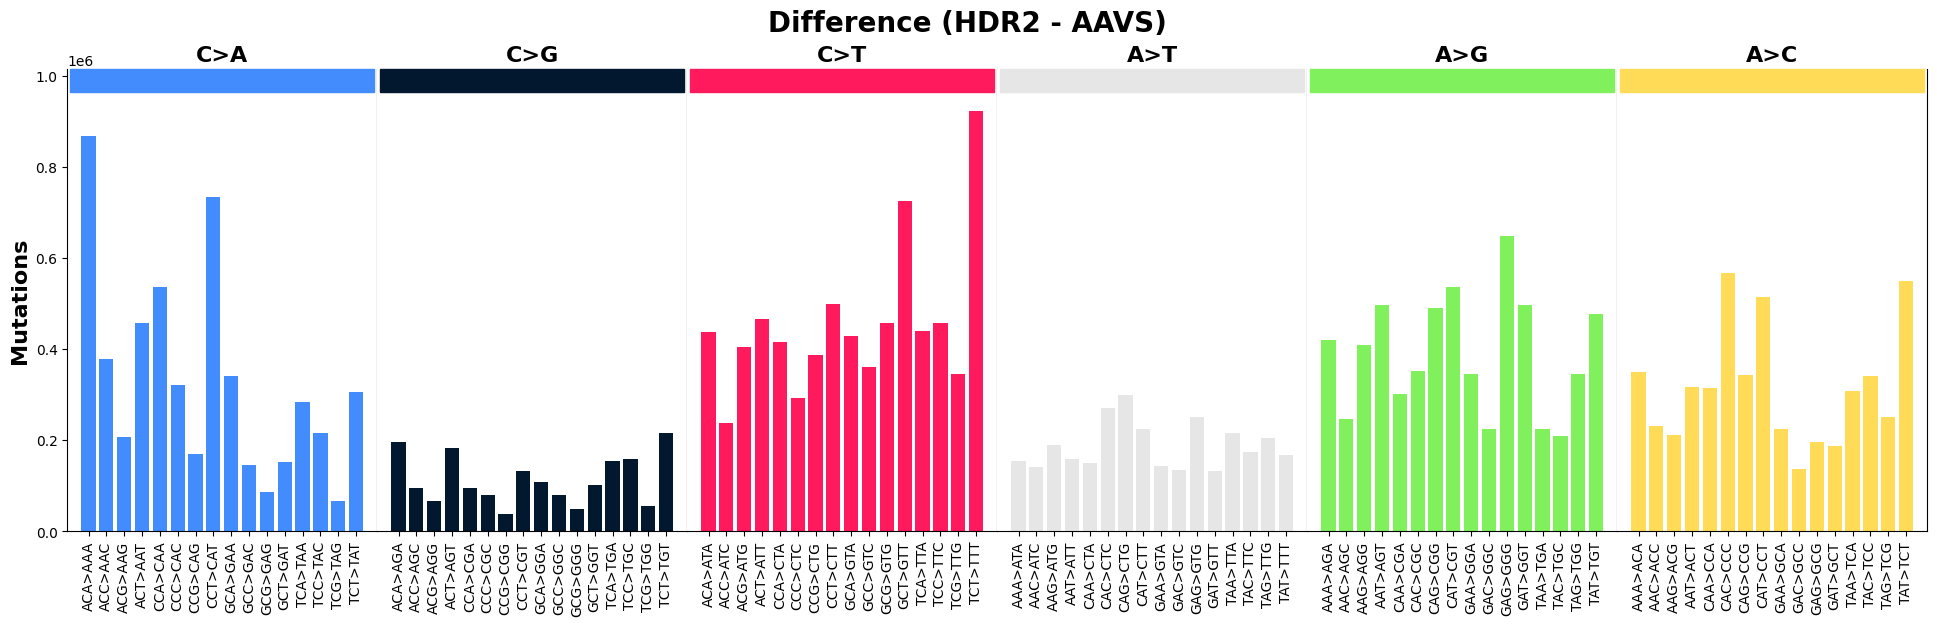

In [22]:
data = difference
fig, axes = plt.subplots(1,6,figsize=(24,6), sharey=True, gridspec_kw={'wspace': 0})
for i, ax in enumerate(axes):
    x = mut_types[titles[i]]
    ax.bar(x, data[x], color=hex_cols[i])
    ax.set_title(f"{titles[i]}",
                 fontweight='bold', 
                 fontsize=16
                )
    ax.set_xticklabels(x,rotation=90)

    rect = patches.Rectangle(
        (0.01, 0.95),  # Bottom left corner of the rectangle (relative to axis coordinates)
        0.98, 0.05,     # Width and height (relative to axis coordinates)
        transform=ax.transAxes,  # Use axis coordinates
        color=hex_cols[i],         # Color of the patch
        clip_on=False            # Ensure the patch extends outside the axis
    )
    ax.add_patch(rect)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(max(data))
    if i == 0:
        # Add y-axis label only to the first subplot
        ax.set_ylabel("Mutations", fontweight='bold', fontsize=16)
    else:
        # Remove the y-axis line and ticks for other subplots
        ax.yaxis.set_visible(False)
        ax.spines["left"].set_visible(False)

axes[0].set_ylim(min(data)+0.1*min(data), max(data)+0.1*max(data))
# axes[0].set_ylim(0,4500)
fig.suptitle("Difference (HDR2 - AAVS)",fontweight='bold', fontsize=20)
fig.savefig('figures/HDR2_minus_AAVS_spectra.png', dpi=600, bbox_inches='tight')

## Time series analysis

In [23]:
import re

pattern = r"aligned/k562_(aavs|hdr2)_(d\d+)_rep(1|2)_S\d+\.bam"

metadata = []
for sample in samples:
    match = re.match(pattern, sample)
    if match:
        template, time, rep = match.groups()
        metadata.append({
            "Sample": sample[8:-4],
            "Sample Path": sample,
            "Template": template,
            "Time": time,
            "Rep": rep
        })

metadata_df = pd.DataFrame(metadata)

# Add total normalized mutations to df
metadata_df['mut'] = metadata_df["Sample Path"].map(spectra.sum(1))
metadata_df['read_count'] = metadata_df["Sample Path"].map(site_counts['total_reads'])
metadata_df['mut_PMR'] = metadata_df["Sample Path"].map(spectra_norm.sum(1))
metadata_df['PolE_mut_PMR'] = metadata_df["Sample Path"].map(spectra_norm[PolE].sum(1))
metadata_df['other_mut_PMR'] = metadata_df["Sample Path"].map(spectra_norm[other].sum(1))
metadata_df['TCT>TTT_mut_PMR'] = metadata_df["Sample Path"].map(spectra_norm['TCT>TTT'])

metadata_df.to_csv('bulk_mutations.csv')
metadata_df

,Sample,Sample Path,Template,Time,Rep,mut,read_count,mut_PMR,PolE_mut_PMR,other_mut_PMR,TCT>TTT_mut_PMR
0,k562_aavs_d15_rep2_S8,aligned/k562_aavs_d15_rep2_S8.bam,aavs,d15,2,5921437.0,511360336,11579.773759,4926.760686,6653.013072,327.281935
1,k562_aavs_d3_rep2_S4,aligned/k562_aavs_d3_rep2_S4.bam,aavs,d3,2,7599947.0,500697401,15178.722687,6486.975953,8691.746734,535.495090
2,k562_aavs_d6_rep2_S5,aligned/k562_aavs_d6_rep2_S5.bam,aavs,d6,2,8669823.0,614848865,14100.738399,6000.913737,8099.824662,508.165531
3,k562_aavs_d9_rep2_S6,aligned/k562_aavs_d9_rep2_S6.bam,aavs,d9,2,7910570.0,504344349,15684.858997,6696.145216,8988.713781,524.641548
4,k562_hdr2_d12_rep2_S12,aligned/k562_hdr2_d12_rep2_S12.bam,hdr2,d12,2,6664293.0,364484823,18284.144029,7697.895284,10586.248745,638.940184
5,k562_hdr2_d15_rep2_S13,aligned/k562_hdr2_d15_rep2_S13.bam,hdr2,d15,2,7159940.0,336751257,21261.806307,8941.041607,12320.764700,714.191840
6,k562_hdr2_d3_rep1_S14,aligned/k562_hdr2_d3_rep1_S14.bam,hdr2,d3,1,8021567.0,490217792,16363.271858,7156.608873,9206.662985,503.927038
7,k562_hdr2_d3_rep2_S9,aligned/k562_hdr2_d3_rep2_S9.bam,hdr2,d3,2,12521629.0,785633952,15938.248300,6914.386765,9023.861535,577.776710
8,k562_hdr2_d6_rep1_S15,aligned/k562_hdr2_d6_rep1_S15.bam,hdr2,d6,1,939270.0,95583292,9826.717414,4008.713155,5818.004260,232.959124
9,k562_hdr2_d6_rep2_S10,aligned/k562_hdr2_d6_rep2_S10.bam,hdr2,d6,2,10431472.0,552607435,18876.821663,8444.647510,10432.174153,592.360832


In [24]:
from scipy.stats import spearmanr
correlations = metadata_df.groupby("Template").apply(lambda g: spearmanr(g["Time"], g["mut_PMR"])[0])

print(correlations)


Template
aavs    0.800000
hdr2   -0.060616
dtype: float64


/loc/scratch/21406449/ipykernel_15623/683681193.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = metadata_df.groupby("Template").apply(lambda g: spearmanr(g["Time"], g["mut_PMR"])[0])


In [25]:
import statsmodels.formula.api as smf

metadata_df["Time"] = pd.Categorical(metadata_df["Time"], categories=["d3", "d6", "d9", "d12", "d15"], ordered=True)

# Define the model formula
# Use C() for categorical variables to treat them correctly
formula = "mut_PMR ~ C(Template) + C(Time)"

# Fit the linear model
model = smf.ols(formula=formula, data=metadata_df).fit()


In [27]:
# import scipy.stats as stats

# # Filter for HDR2 category
# hdr2_df = metadata_df[metadata_df["Template"] == "hdr2"]

# # Compute Pearson's correlation
# pearson_corr, p_value = stats.pearsonr(hdr2_df["Time_numeric"], hdr2_df["mut_PMR"])

# print(f"Pearson correlation: {pearson_corr:.4f}")
# print(f"P-value: {p_value:.4e}")

In [28]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(Template),1.0,2.351078e+07,2.351078e+07,1.855437,0.222070
C(Time),4.0,1.755706e+07,4.389266e+06,0.346395,0.837932
Residual,6.0,7.602775e+07,1.267129e+07,NaN,NaN


In [29]:
# Ensure Time is a categorical variable and map it to numeric values
time_mapping = {"d3": 3,"d6":6, "d9": 9, "d12": 12, "d15":15}
metadata_df["Time_numeric"] = metadata_df["Time"].map(time_mapping)

metadata_df["Time_numeric"] = metadata_df["Time_numeric"].astype(float)

model = smf.ols("mut_PMR ~ Time_numeric * Template", data=metadata_df).fit()

In [30]:
model.summary()

/home/dmullane/micromamba/envs/default_jupyter/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mut_PMR   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2.353
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.148
Time:                        13:27:56   Log-Likelihood:                -109.79
No. Observations:                  12   AIC:                             227.6
Df Residuals:                       8   BIC:                             229.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.639e+04   2943.448      5.567      0.001    9599.528    2.32e+04
Template[T.hdr2]              -2841.8223   3673.849     -0.774      0.461   -1.13e+04    5630.089
Time_numeric                   -272.8614    314.219     -0.868      0.410    -997.452     451.729
Time_numeric:Template[T.hdr2]   724.9226    401.246      1.807      0.108    -200.352    1650.197
==============================================================================
Omnibus:                       13.978   Durbin-Watson:                   2.610
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.592
Skew:                          -1.630   Prob(JB):                       0.0136
Kurtosis:                       5.562   Cond. No.                         61.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

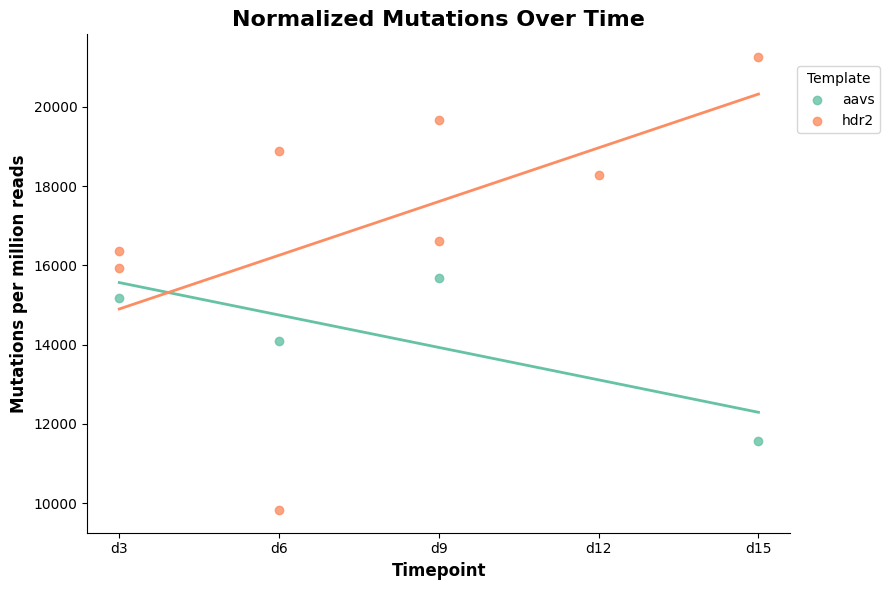

In [31]:
# Create a scatter plot with regression lines for each condition
fig = sns.lmplot(
    data=metadata_df,
    x="Time_numeric",
    y="mut_PMR",
    hue="Template",
    # markers=["o", "s"],  # Different markers for PTA and gDNA
    palette="Set2",
    ci=None,  # Disable confidence intervals
    scatter_kws={"alpha": 0.8},  # Customize scatter points
    line_kws={"linewidth": 2},  # Customize line appearance
    legend=False,
    height=6,  # Height of the plot in inches
    aspect=1.5,  # Aspect ratio (width = height * aspect)
)

# Move the legend inside the plot
plt.legend(
    title="Template",
    loc="upper left",  # Change position; options include 'upper right', 'lower left', etc.
    bbox_to_anchor=(1, 0.95),  # Adjust coordinates to fine-tune placement
    fontsize=10
)


# Update x-axis tick labels to show the original categorical values
plt.xticks(ticks=[3, 6, 9, 12, 15], labels=["d3", "d6", "d9", "d12", "d15"], fontsize=10)
plt.title("Normalized Mutations Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Timepoint", fontsize=12, fontweight='bold')
plt.ylabel("Mutations per million reads", fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()
# fig.savefig('figures/normalized_mutations_vs_time.png', dpi=600, bbox_inches='tight')

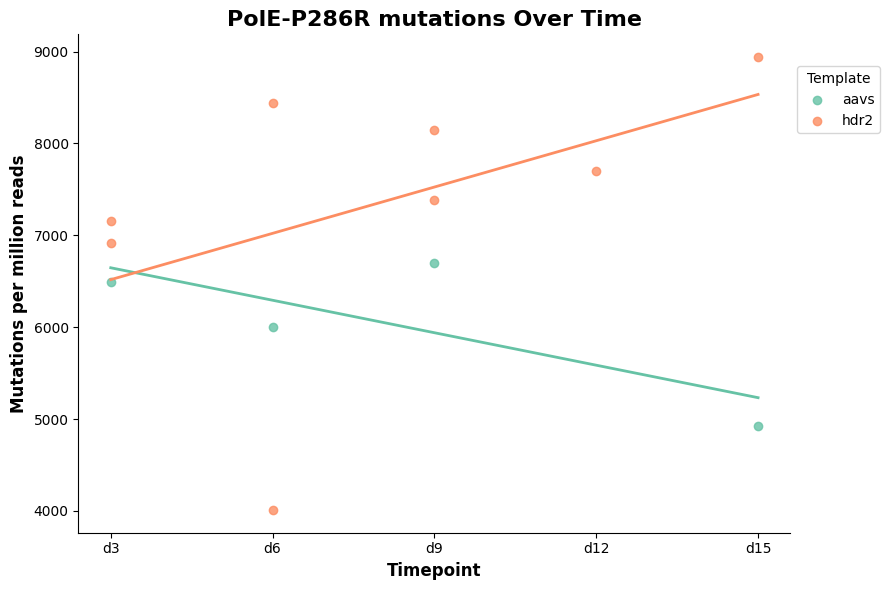

In [32]:
# Create a scatter plot with regression lines for each condition
fig = sns.lmplot(
    data=metadata_df,
    x="Time_numeric",
    y="PolE_mut_PMR",
    hue="Template",
    # markers=["o", "s"],  # Different markers for PTA and gDNA
    palette="Set2",
    ci=None,  # Disable confidence intervals
    scatter_kws={"alpha": 0.8},  # Customize scatter points
    line_kws={"linewidth": 2},  # Customize line appearance
    legend=False,
    height=6,  # Height of the plot in inches
    aspect=1.5,  # Aspect ratio (width = height * aspect)
)

# Move the legend inside the plot
plt.legend(
    title="Template",
    loc="upper left",  # Change position; options include 'upper right', 'lower left', etc.
    bbox_to_anchor=(1, 0.95),  # Adjust coordinates to fine-tune placement
    fontsize=10
)


# Update x-axis tick labels to show the original categorical values
plt.xticks(ticks=[3, 6, 9, 12, 15], labels=["d3", "d6", "d9", "d12", "d15"], fontsize=10)
plt.title("PolE-P286R mutations Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Timepoint", fontsize=12, fontweight='bold')
plt.ylabel("Mutations per million reads", fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()
# fig.savefig('figures/normalized_mutations_vs_time.png', dpi=600, bbox_inches='tight')

In [33]:
metadata_df

,Sample,Sample Path,Template,Time,Rep,mut,read_count,mut_PMR,PolE_mut_PMR,other_mut_PMR,TCT>TTT_mut_PMR,Time_numeric
0,k562_aavs_d15_rep2_S8,aligned/k562_aavs_d15_rep2_S8.bam,aavs,d15,2,5921437.0,511360336,11579.773759,4926.760686,6653.013072,327.281935,15.0
1,k562_aavs_d3_rep2_S4,aligned/k562_aavs_d3_rep2_S4.bam,aavs,d3,2,7599947.0,500697401,15178.722687,6486.975953,8691.746734,535.495090,3.0
2,k562_aavs_d6_rep2_S5,aligned/k562_aavs_d6_rep2_S5.bam,aavs,d6,2,8669823.0,614848865,14100.738399,6000.913737,8099.824662,508.165531,6.0
3,k562_aavs_d9_rep2_S6,aligned/k562_aavs_d9_rep2_S6.bam,aavs,d9,2,7910570.0,504344349,15684.858997,6696.145216,8988.713781,524.641548,9.0
4,k562_hdr2_d12_rep2_S12,aligned/k562_hdr2_d12_rep2_S12.bam,hdr2,d12,2,6664293.0,364484823,18284.144029,7697.895284,10586.248745,638.940184,12.0
5,k562_hdr2_d15_rep2_S13,aligned/k562_hdr2_d15_rep2_S13.bam,hdr2,d15,2,7159940.0,336751257,21261.806307,8941.041607,12320.764700,714.191840,15.0
6,k562_hdr2_d3_rep1_S14,aligned/k562_hdr2_d3_rep1_S14.bam,hdr2,d3,1,8021567.0,490217792,16363.271858,7156.608873,9206.662985,503.927038,3.0
7,k562_hdr2_d3_rep2_S9,aligned/k562_hdr2_d3_rep2_S9.bam,hdr2,d3,2,12521629.0,785633952,15938.248300,6914.386765,9023.861535,577.776710,3.0
8,k562_hdr2_d6_rep1_S15,aligned/k562_hdr2_d6_rep1_S15.bam,hdr2,d6,1,939270.0,95583292,9826.717414,4008.713155,5818.004260,232.959124,6.0
9,k562_hdr2_d6_rep2_S10,aligned/k562_hdr2_d6_rep2_S10.bam,hdr2,d6,2,10431472.0,552607435,18876.821663,8444.647510,10432.174153,592.360832,6.0
